# CIMIS ETo Exploratory Data Analysis
## Written by Arman Ahmadi


## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import os
import glob
import scipy as sp
import sklearn as skl

from google.colab import files

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

from datetime import datetime

import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Access Data From Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/MyDrive/Ph.D. Research')

Mounted at /content/gdrive


## Import Input Data

In [ ]:
path = r'/content/gdrive/MyDrive/Ph.D. Research/AllGoodStations_1986_2021'
all_files = glob.glob(path + "/*.csv")

stations = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    stations.append(df)

## Data Preprocessing

In [ ]:
# Changing the columns' names

for i in range(len(stations)):
  stations[i].columns = ['StnID', 'StnName', 'EToZone', 'Elevation', 'CIMISRegion', 'Date', 'Jul', 'ETo', 'qc0', \
                    'Precipitation', 'qc1', 'SolRad', 'qc2', 'NetRad', 'qc3', 'MaxVapPres', 'qc4', \
                    'MinVapPres', 'qc5', 'AvgVapPres', 'qc6', 'MaxAirTemp', 'qc7', 'MinAirTemp', 'qc8', \
                    'AvgAirTemp', 'qc9', 'MaxRelHum', 'qc10', 'MinRelHum', 'qc11', 'AvgRelHum', 'qc12', \
                    'DewPoint', 'qc13', 'AvgWindSpeed', 'qc14', 'RoseNNE', 'qc15', 'RoseENE', 'qc16', \
                    'RoseESE', 'qc17', 'RoseSSE', 'qc18', 'RoseSSW', 'qc19', 'RoseWSW', 'qc20', \
                    'RoseWNW', 'qc21', 'RoseNNW', 'qc22', 'WindRun', 'qc23', 'MaxSoilTemp', 'qc24', \
                    'MinSoilTemp', 'qc25', 'AvgSoilTemp', 'qc26', 'PMETo', 'qc27', 'PMETr', 'qc28', \
                    'BattVolt', 'qc29', 'Exp1', 'Exp2']


# Removing rows containing NaN in essential columns (where there is
#   no reading for essential variables)

StationsNan = []
for i in range(len(stations)):
  StationsNan.append(stations[i].dropna(subset=['Elevation', 'MaxAirTemp', 'MinAirTemp', 'AvgVapPres',\
                                                 'NetRad', 'AvgWindSpeed', 'Precipitation']))


# Merging all data and calculating the number and proportion of NaNs

AllStn = pd.concat(stations, axis=0, ignore_index=True)
BeforeNaNDrop = len(AllStn)
AllStnNan = pd.DataFrame.reset_index(AllStn.dropna(subset=['Elevation', 'MaxAirTemp', 'MinAirTemp', 'AvgVapPres',\
                                                 'NetRad', 'AvgWindSpeed', 'Precipitation']))

AfterNaNDrop = len(AllStnNan)
print('Number of samples BEFORE removing rows containing NaN: ', BeforeNaNDrop)
print('Number of samples AFTER removing rows containing NaN: ', AfterNaNDrop)
print('Number of removed samples due to NaN: ', BeforeNaNDrop-AfterNaNDrop)
print('Proportion of removed samples due to NaN: ', (BeforeNaNDrop-AfterNaNDrop)/BeforeNaNDrop)
print()


# Removing rows with problematic data flags ('R') and calculating the number and proportion of QC flags

StationsNanQc = []
for i in range(len(StationsNan)):
  A1 = StationsNan[i][~StationsNan[i]['qc2'].str.contains('R')]
  A2 = A1[~A1['qc3'].str.contains('R')]
  A3 = A2[~A2['qc4'].str.contains('R')]
  A4 = A3[~A3['qc5'].str.contains('R')]
  A5 = A4[~A4['qc6'].str.contains('R')]
  A6 = A5[~A5['qc7'].str.contains('R')]
  A7 = A6[~A6['qc8'].str.contains('R')]
  A8 = A7[~A7['qc9'].str.contains('R')]
  A9 = A8[~A8['qc10'].str.contains('R')]
  A10 = A9[~A9['qc11'].str.contains('R')]
  A11 = A10[~A10['qc12'].str.contains('R')]
  A12 = A11[~A11['qc13'].str.contains('R')]
  A13 = A12[~A12['qc14'].str.contains('R')]
  A14 = A13[~A13['qc27'].str.contains('R')]
  A15 = A14[~A14['qc1'].str.contains('R')]

  StationsNanQc.append(A15)

AllStnNanQc = pd.concat(StationsNanQc, axis=0, ignore_index=True)

AfterQcDrop = len(AllStnNanQc)
print('Number of samples AFTER removing rows containing QC flags: ', AfterQcDrop)
print('Number of removed samples due to QC flags: ', AfterNaNDrop-AfterQcDrop)
print('Proportion of removed samples due to QC flags: ', (AfterNaNDrop-AfterQcDrop)/BeforeNaNDrop)


# Selecting a subset of important variables

columns = [0,1,2,3,4,5,6,9,11,13,15,17,19,21,23,25,27,29,31,33,35,55,57,59,61]
StationsNanQcSelected = []
for i in range(len(StationsNanQc)):
  StationsNanQcSelected.append(StationsNanQc[i].iloc[:, columns])

AllStnNanQcSelected = pd.concat(StationsNanQcSelected, axis=0, ignore_index=True)


# Renaming the final subsets to use in the following sections

stn = StationsNanQcSelected
AllStn = AllStnNanQcSelected

# Rounding ETo zones and StnID to an integer number

AllStn.EToZone = AllStn.EToZone.astype(int)
AllStn.StnID = AllStn.StnID.astype(int)

Number of samples BEFORE removing rows containing NaN:  1363125
Number of samples AFTER removing rows containing NaN:  1254168
Number of removed samples due to NaN:  108957
Proportion of removed samples due to NaN:  0.07993177441540578

Number of samples AFTER removing rows containing QC flags:  1101092
Number of removed samples due to QC flags:  153076
Proportion of removed samples due to QC flags:  0.1122978450252178


In [ ]:
# Adding more meteorological variables and Calculating Daily ETo
# Calculations based on the document sent by dr. Snyder

# Saturation vapor pressure (kPa) at the maximum and minimum daily air temperature (deg.C)
AllStn['es_max'] = 0.6108 * np.exp((17.27*AllStn.MaxAirTemp) / (AllStn.MaxAirTemp+237.3))
AllStn['es_min'] = 0.6108 * np.exp((17.27*AllStn.MinAirTemp) / (AllStn.MinAirTemp+237.3))


# Mean daily saturation vapor pressure (kPa)
AllStn['SatVapPres'] = (AllStn.es_max + AllStn.es_min) / 2


# Vapor pressure deficit (kPa)
AllStn['VPD'] = AllStn.SatVapPres - AllStn.AvgVapPres


# Beta: barometric pressure in kPa as a function of elevation in meters
AllStn['Beta'] = 101.3 * (((293-0.0065*AllStn.Elevation)/293) ** 5.26)

# Gamma: psychrometric constant in kPa/deg.C
AllStn['Gamma'] = 0.00163 * (AllStn.Beta / 2.45)

# e0: saturation vapor pressure at mean daily temperature
AllStn['Tmean'] = (AllStn.MaxAirTemp + AllStn.MinAirTemp) / 2
AllStn['e0'] = 0.6108 * np.exp((17.27*AllStn.Tmean) / (AllStn.Tmean+237.3))

# Delta: slope of the saturation vapor pressure curve (kPa/deg.C) at mean air temperature (Tmean)
AllStn['Delta'] = (4099*AllStn.e0) / ((AllStn.Tmean+237.3)**2)

# Ro: radiation term of the PM equation for short canopy reference ET
AllStn['Ro'] = (0.408*AllStn.Delta*(AllStn.NetRad*0.0864)) / (AllStn.Delta + \
                      AllStn.Gamma*(1+0.34*AllStn.AvgWindSpeed))

# Ao: aerodynamic term of the PM equation for short canopy reference ET
AllStn['Ao'] = (((900*AllStn.Gamma)/(AllStn.Tmean+273))*AllStn.AvgWindSpeed*(AllStn.SatVapPres-AllStn.AvgVapPres))/\
  (AllStn.Delta+AllStn.Gamma*(1+0.34*AllStn.AvgWindSpeed))

AllStn['Daily_PMETo'] = AllStn.Ro + AllStn.Ao

(-2.0, 2.0)

<Figure size 720x720 with 0 Axes>

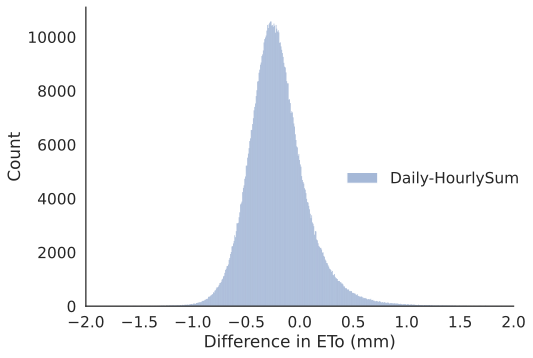

In [ ]:
# Comaring Daily PM ETo with summation of hourly PM ETo

AllStn['Daily-HourlySum'] = AllStn.Daily_PMETo - AllStn.PMETo

# AllStn2 = AllStn.iloc[802000:803000]
# from google.colab import files
# AllStn2.to_csv('AllStn2.csv')
# files.download('AllStn2.csv')

# AllStn2 = AllStn[['PMETo','Daily_PMETo','Daily-HourlySum']]
# AllStn2.describe()

plt.figure(figsize=(10,10))

sns.displot(AllStn[['Daily-HourlySum']])

sns.set(font_scale=1.4,style='white')
plt.tight_layout()
plt.xlabel('Difference in ETo (mm)')
plt.xlim([-2,2])

# plt.savefig('Daily-HourlySum.jpg', dpi=600)

## Data Exploration - Phase 1

In [ ]:
# Using describe function to explore variables and stations statistical characteristics

StnDescribe = []
for i in range(len(stn)):
  StnDescribe.append(stn[i].describe())

AllStn.describe()

,EToZone,Elevation,Jul,SolRad,NetRad,MaxVapPres,MinVapPres,AvgVapPres,MaxAirTemp,MinAirTemp,...,es_min,SatVapPres,VPD,Beta,Gamma,Tmean,e0,Delta,Ro,Ao
count,884555.000000,884555.000000,884555.000000,884555.000000,884555.000000,884555.000000,884555.000000,884555.000000,884555.000000,884555.000000,...,884555.000000,884555.000000,884555.000000,884555.000000,884555.000000,884555.000000,884555.000000,884555.000000,884555.000000,884555.000000
mean,10.495430,204.843670,184.167046,205.873945,96.535361,1.459606,0.846687,1.119778,23.182918,8.678476,...,1.212627,2.179263,1.059485,98.963864,0.065841,15.930697,1.959820,0.122737,21.509834,-17.819022
std,4.875218,339.176815,106.270509,92.652416,61.095867,0.499842,0.357725,0.391130,8.021651,6.205351,...,0.523385,1.006159,0.855654,3.767274,0.002506,6.652269,0.874563,0.047426,15.093298,13.156825
min,1.000000,-54.864000,1.000000,0.000000,-20.000000,0.000000,0.000000,0.000000,-7.300000,-24.500000,...,0.083634,0.227564,-0.229130,78.758950,0.052399,-15.000000,0.190462,0.015798,-4.611349,-54.446595
25%,6.000000,24.993600,92.000000,129.000000,40.000000,1.100000,0.600000,0.800000,17.200000,4.600000,...,0.848252,1.445808,0.423206,99.383679,0.066121,11.250000,1.334689,0.088559,7.573717,-29.467832
50%,12.000000,82.296000,184.000000,206.000000,95.000000,1.400000,0.800000,1.100000,22.300000,8.800000,...,1.132641,1.921844,0.795536,100.330984,0.066751,15.450000,1.755384,0.112634,19.903519,-16.372697
75%,14.000000,163.372800,277.000000,289.000000,155.000000,1.700000,1.100000,1.400000,29.000000,12.700000,...,1.468630,2.687965,1.484596,101.004908,0.067199,20.300000,2.382059,0.147143,34.866973,-5.657796
max,18.000000,2106.168000,366.000000,393.000000,224.000000,5.000000,3.200000,3.900000,49.500000,33.700000,...,5.231050,8.253375,6.953375,101.950211,0.067828,40.950000,7.757320,0.410695,61.914678,8.761511


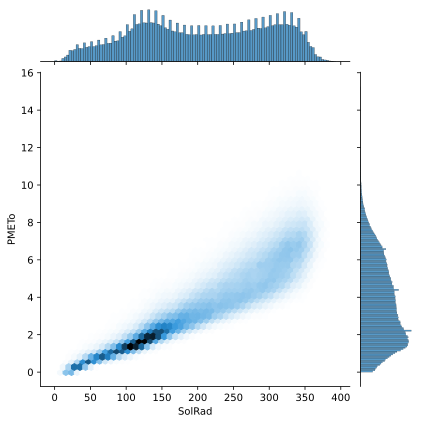

In [ ]:
# Joint plot to explore the correlation of different meteorological variables with PMETo
# Explore r and p value on jointplot as well

j = sns.jointplot(data = AllStn, x = 'SolRad', y = 'PMETo', kind='hex')
# plt.savefig('test2.jpg',dpi=400)

In [ ]:
# Selecting special statistical values from the describe function

MeanSolRad = []
for i in range(len(StnDescribe)):
  MeanSolRad.append(StnDescribe[i][1:2][['SolRad']])

## Data Exploration - Phase 2

In [ ]:
# Having a look at the data

AllStn

,StnID,StnName,EToZone,Elevation,CIMISRegion,Date,Jul,Precipitation,SolRad,NetRad,...,Tmean,e0,Delta,Ro,Ao,Daily_PMETo,Daily-HourlySum,Season,Month,Year
0,2,FivePoints,16,86.8680,San Joaquin Valley,1986-03-20,79.0,0.0,236.0,145.0,...,15.45,1.755384,0.112634,2.727162,1.271112,3.998274,NaN,Spring,3,1986
1,2,FivePoints,16,86.8680,San Joaquin Valley,1986-03-21,80.0,0.0,239.0,141.0,...,16.20,1.841645,0.117470,2.568936,1.386317,3.955252,NaN,Spring,3,1986
2,2,FivePoints,16,86.8680,San Joaquin Valley,1986-03-24,83.0,0.0,69.0,12.0,...,17.05,1.943878,0.123164,0.198503,1.576211,1.774714,NaN,Spring,3,1986
3,2,FivePoints,16,86.8680,San Joaquin Valley,1986-03-26,85.0,0.0,243.0,140.0,...,17.50,1.999987,0.126272,2.745112,1.401096,4.146208,NaN,Spring,3,1986
4,2,FivePoints,16,86.8680,San Joaquin Valley,1986-03-27,86.0,0.0,236.0,139.0,...,22.05,2.652000,0.161614,2.967116,2.360705,5.327821,NaN,Spring,3,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101087,238,Moreno Valley,6,488.8992,South Coast Valleys,2018-03-13,72.0,0.9,147.0,68.0,...,16.95,1.931598,0.122482,1.370368,0.638879,2.009248,-0.380752,Winter,3,2018
1101088,238,Moreno Valley,6,488.8992,South Coast Valleys,2018-03-14,73.0,1.0,142.0,58.0,...,14.00,1.598605,0.103761,1.017441,0.984425,2.001866,-0.298134,Winter,3,2018
1101089,238,Moreno Valley,6,488.8992,South Coast Valleys,2018-03-15,74.0,7.6,174.0,85.0,...,12.90,1.488002,0.097433,1.399049,1.156213,2.555262,-0.144738,Winter,3,2018
1101090,238,Moreno Valley,6,488.8992,South Coast Valleys,2018-03-16,75.0,0.5,148.0,65.0,...,10.80,1.295364,0.086261,1.046633,0.859147,1.905781,-0.324219,Winter,3,2018


In [ ]:
# Number of data points in each ETo zone

AllStn.groupby(['EToZone']).size()

EToZone
1      11871
2      58520
3      76001
4       1906
5      44036
6     117060
7      37222
8      58367
9      66083
10     23816
12    168075
13     35224
14    143322
15     76179
16     70125
17     39946
18     73339
dtype: int64

In [ ]:
# Statistical analysis of ETo zones

AllStnImpVar = AllStn[['EToZone','SolRad','AvgAirTemp','AvgVapPres','AvgWindSpeed','PMETo']]
AllStnImpVar[AllStnImpVar.EToZone==14].describe()

,EToZone,SolRad,AvgAirTemp,AvgVapPres,AvgWindSpeed,PMETo
count,143322.0,143266.000000,143322.000000,143322.000000,143322.000000,125485.000000
mean,14.0,206.515265,15.168156,1.039200,2.274317,3.828158
std,0.0,98.069500,6.869277,0.370756,1.114472,2.252247
min,14.0,0.000000,-9.700000,0.000000,0.500000,0.000000
25%,14.0,124.000000,9.900000,0.800000,1.500000,1.810000
50%,14.0,207.000000,15.100000,1.000000,2.000000,3.680000
75%,14.0,297.000000,20.700000,1.300000,2.700000,5.790000
max,14.0,391.000000,35.000000,2.600000,10.900000,13.870000


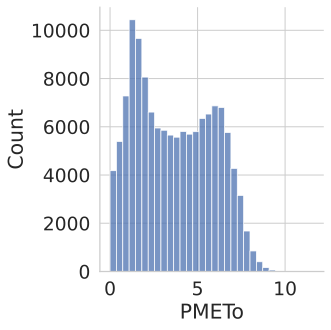

In [ ]:
# Histograms of PMETo for ETo zones

h1 = sns.displot(AllStnImpVar[AllStnImpVar.EToZone==12].PMETo, bins=32)

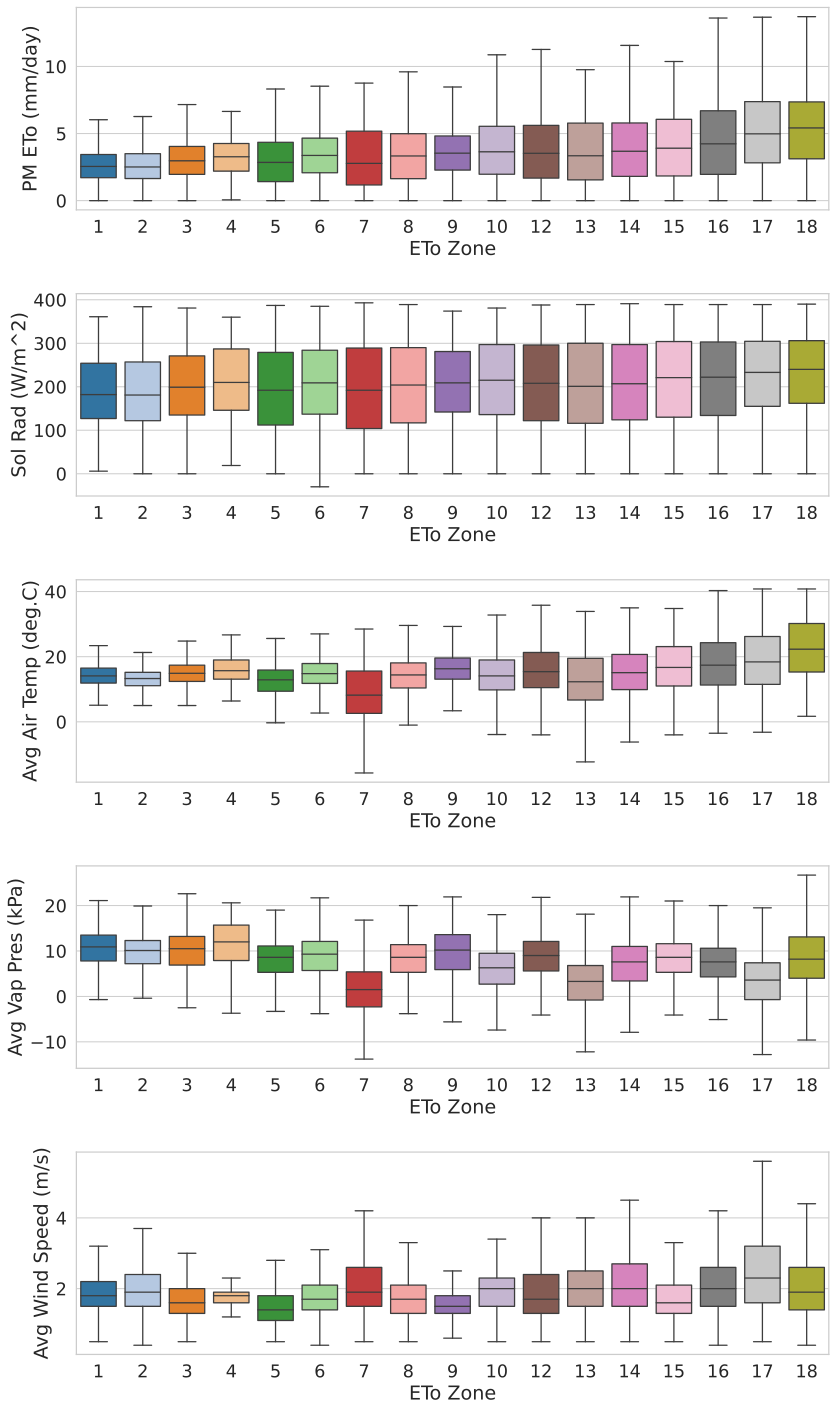

In [ ]:
# Violin and box plots (Make them more professional and also bold the differences between different boxes)

BoxPlotData = AllStnImpVar
BoxPlotData.columns = ['ETo Zone','Sol Rad (W/m^2)','Avg Air Temp (deg.C)',\
                       'Avg Vap Pres (kPa)','Avg Wind Speed (m/s)','PM ETo (mm/day)']
f, axes = plt.subplots(5,1, figsize=(12,20))

PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'blue'},
    'medianprops':{'color':'red'},
    'whiskerprops':{'color':'cornflowerblue'},
    'capprops':{'color':'cornflowerblue'}
}

z1 = sns.boxplot(data = AllStnImpVar, x = 'ETo Zone', y = 'PM ETo (mm/day)', showfliers = False,\
                 linewidth=1.3, ax=axes[0],palette='tab20' )
z2 = sns.boxplot(data = AllStnImpVar, x = 'ETo Zone', y = 'Sol Rad (W/m^2)', showfliers = False,\
                 ax=axes[1],linewidth=1.3,palette='tab20')
z3 = sns.boxplot(data = AllStnImpVar, x = 'ETo Zone', y = 'Avg Air Temp (deg.C)', showfliers = False,\
                 ax=axes[2],linewidth=1.3,palette='tab20')
z4 = sns.boxplot(data = AllStnImpVar, x = 'ETo Zone', y = 'Avg Vap Pres (kPa)', showfliers = False,\
                 ax=axes[3],linewidth=1.3,palette='tab20')
z5 = sns.boxplot(data = AllStnImpVar, x = 'ETo Zone', y = 'Avg Wind Speed (m/s)', showfliers = False,\
                 ax=axes[4],linewidth=1.3,palette='tab20')

# Controlling figure aesthetics

# sns.set_context('paper',font_scale=1.2)  #, rc={"lines.linewidth": 1})

# z1.axes.get_xaxis().set_visible(False)
# z2.axes.get_xaxis().set_visible(False)
# z3.axes.get_xaxis().set_visible(False)
# z4.axes.get_xaxis().set_visible(False)
# z5.set_xticklabels(z1.get_xticklabels(),rotation=0)
sns.set(font_scale=1.6,style='whitegrid')
plt.tight_layout()

# plt.savefig('boxplots.jpg', dpi=600)

AllStnImpVar = AllStn[['EToZone','SolRad','AvgAirTemp','DewPoint','AvgWindSpeed','PMETo']]

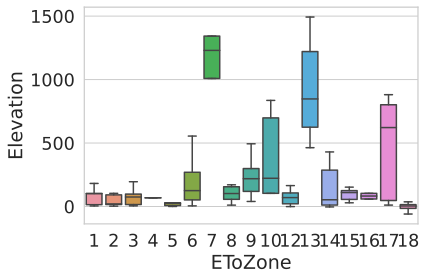

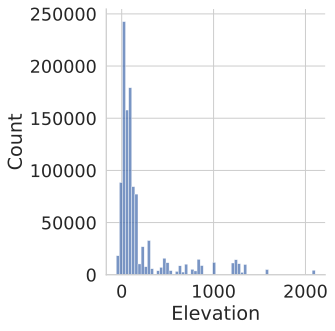

In [ ]:
# Visualization of Elevation

z6 = sns.boxplot(data = AllStn, x = 'EToZone', y = 'Elevation', showfliers = False)
z7 = sns.displot(AllStn.Elevation, bins=64)

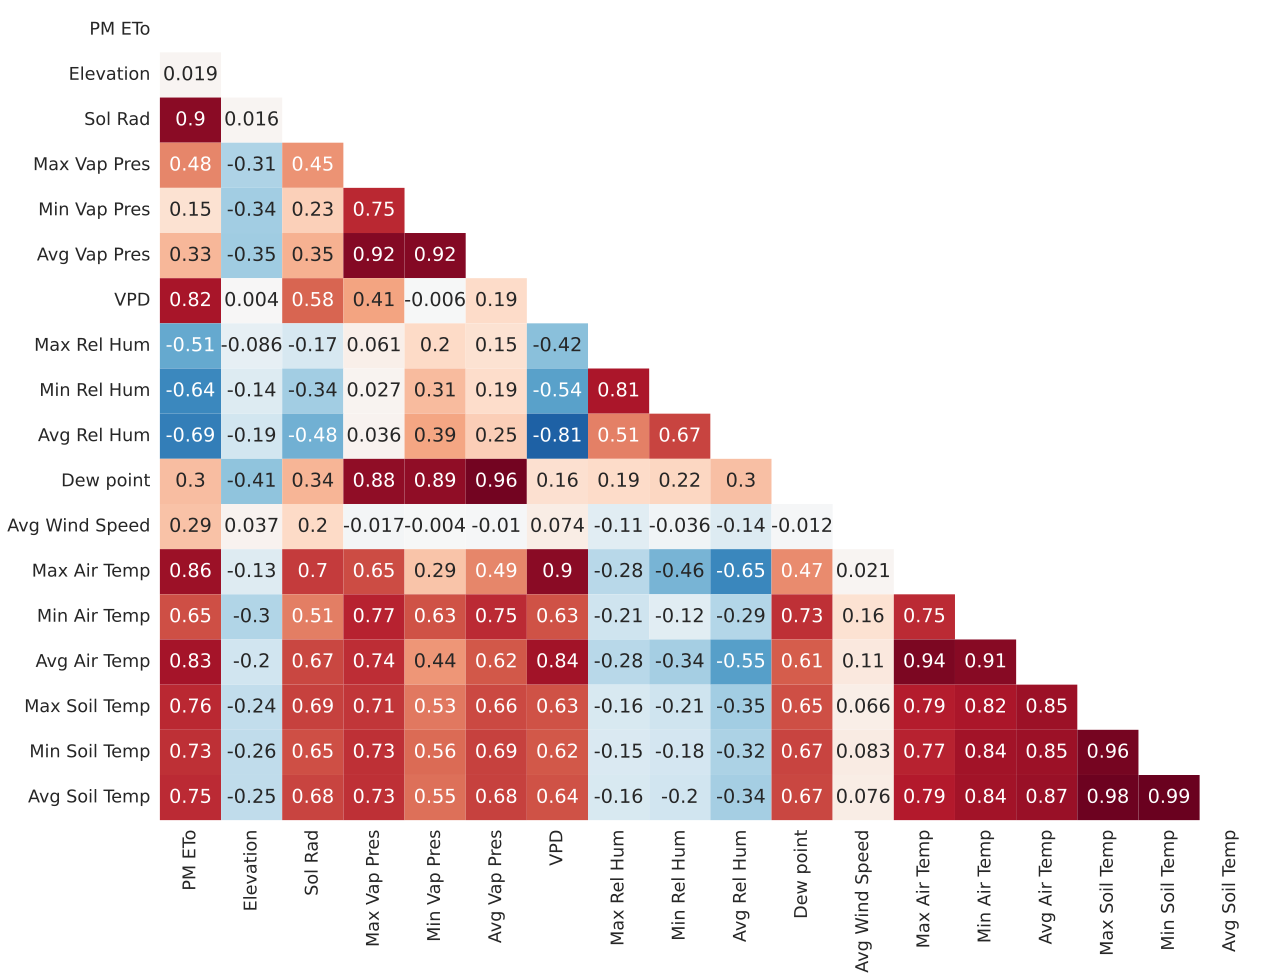

In [ ]:
# General heatmaps of correlation coefficients

heatmap_correlation_data = AllStn[[  'PMETo','Elevation', 'SolRad', 'MaxVapPres', 'MinVapPres', 'AvgVapPres',\
                                     'VPD', 'MaxRelHum','MinRelHum','AvgRelHum', 'DewPoint', 'AvgWindSpeed',\
                                     'MaxAirTemp', 'MinAirTemp', 'AvgAirTemp', 'MaxSoilTemp',\
                                     'MinSoilTemp', 'AvgSoilTemp']]
heatmap_correlation_data.columns = ['PM ETo', 'Elevation', 'Sol Rad', 'Max Vap Pres', 'Min Vap Pres',\
                                    'Avg Vap Pres', 'VPD', 'Max Rel Hum', 'Min Rel Hum', 'Avg Rel Hum', 'Dew point',\
                                    'Avg Wind Speed','Max Air Temp', 'Min Air Temp', 'Avg Air Temp',\
                                    'Max Soil Temp', 'Min Soil Temp', 'Avg Soil Temp']
plt.figure(figsize=(18,14))
mask = np.triu(np.ones_like(heatmap_correlation_data.corr(), dtype=np.bool))
heatmap = sns.heatmap(round(heatmap_correlation_data.corr(),3), vmin=-1, vmax=1,\
                      annot=True, cmap='RdBu_r',mask=mask, cbar=False)

sns.set(font_scale=1.6,style='white')
plt.tight_layout()
# heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# plt.savefig('correlation_heatmap.jpg', dpi=600)

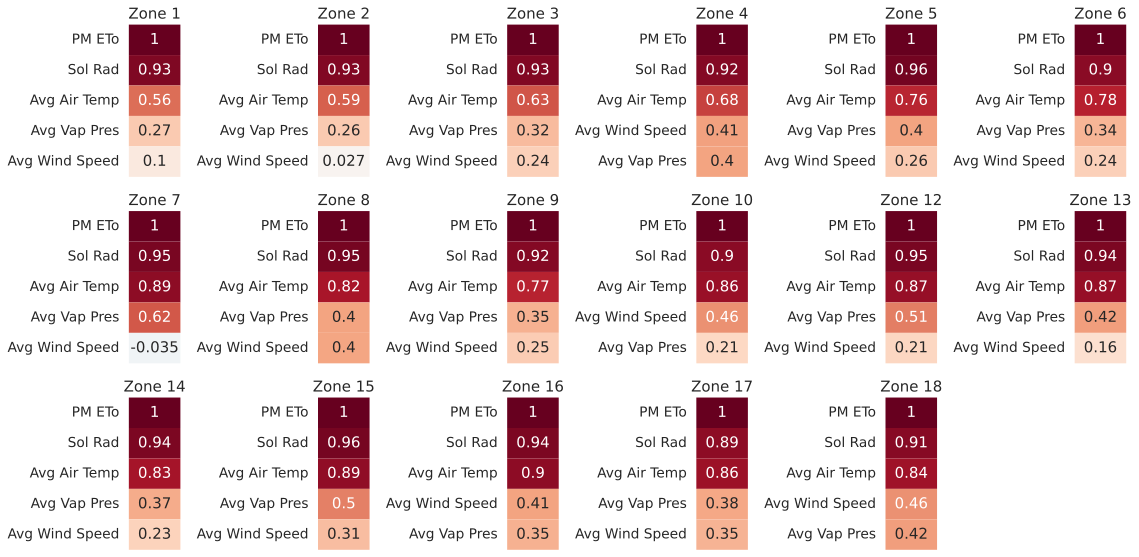

In [ ]:
# Correlation of meteorological variables with PMETo

'''
I tested and in all zones Max Air Temp has a higher or equal correlation with ETo than Avg Air Temp
So I use Max Air Temp in this visualization
'''

PCdata = AllStn[['EToZone','PMETo','SolRad','AvgVapPres','AvgWindSpeed','AvgAirTemp']]
PCdata.columns = ['EToZone','PM ETo','Sol Rad','Avg Vap Pres','Avg Wind Speed','Avg Air Temp']
f, axes = plt.subplots(3,6, figsize=(16,8))
z1 = sns.heatmap(PCdata[PCdata.EToZone==1][['PM ETo','Sol Rad','Avg Vap Pres','Avg Wind Speed','Avg Air Temp',\
                                            ]].corr()[['PM ETo']].sort_values(by='PM ETo', ascending=False),\
                      vmin=-1, vmax=1, annot=True, cmap='RdBu_r',cbar=False,ax=axes[0,0])
z2 = sns.heatmap(PCdata[PCdata.EToZone==2][['PM ETo','Sol Rad','Avg Vap Pres','Avg Wind Speed','Avg Air Temp',\
                                            ]].corr()[['PM ETo']].sort_values(by='PM ETo', ascending=False),\
                      vmin=-1, vmax=1, annot=True, cmap='RdBu_r',cbar=False,ax=axes[0,1])
z3 = sns.heatmap(PCdata[PCdata.EToZone==3][['PM ETo','Sol Rad','Avg Vap Pres','Avg Wind Speed','Avg Air Temp',\
                                            ]].corr()[['PM ETo']].sort_values(by='PM ETo', ascending=False),\
                      vmin=-1, vmax=1, annot=True, cmap='RdBu_r',cbar=False,ax=axes[0,2])
z4 = sns.heatmap(PCdata[PCdata.EToZone==4][['PM ETo','Sol Rad','Avg Vap Pres','Avg Wind Speed','Avg Air Temp',\
                                            ]].corr()[['PM ETo']].sort_values(by='PM ETo', ascending=False),\
                      vmin=-1, vmax=1, annot=True, cmap='RdBu_r',cbar=False,ax=axes[0,3])
z5 = sns.heatmap(PCdata[PCdata.EToZone==5][['PM ETo','Sol Rad','Avg Vap Pres','Avg Wind Speed','Avg Air Temp',\
                                            ]].corr()[['PM ETo']].sort_values(by='PM ETo', ascending=False),\
                      vmin=-1, vmax=1, annot=True, cmap='RdBu_r',cbar=False,ax=axes[0,4])
z6 = sns.heatmap(PCdata[PCdata.EToZone==6][['PM ETo','Sol Rad','Avg Vap Pres','Avg Wind Speed','Avg Air Temp',\
                                            ]].corr()[['PM ETo']].sort_values(by='PM ETo', ascending=False),\
                      vmin=-1, vmax=1, annot=True, cmap='RdBu_r',cbar=False,ax=axes[0,5])
z7 = sns.heatmap(PCdata[PCdata.EToZone==7][['PM ETo','Sol Rad','Avg Vap Pres','Avg Wind Speed','Avg Air Temp',\
                                            ]].corr()[['PM ETo']].sort_values(by='PM ETo', ascending=False),\
                      vmin=-1, vmax=1, annot=True, cmap='RdBu_r',cbar=False,ax=axes[1,0])
z8 = sns.heatmap(PCdata[PCdata.EToZone==8][['PM ETo','Sol Rad','Avg Vap Pres','Avg Wind Speed','Avg Air Temp',\
                                            ]].corr()[['PM ETo']].sort_values(by='PM ETo', ascending=False),\
                      vmin=-1, vmax=1, annot=True, cmap='RdBu_r',cbar=False,ax=axes[1,1])
z9 = sns.heatmap(PCdata[PCdata.EToZone==9][['PM ETo','Sol Rad','Avg Vap Pres','Avg Wind Speed','Avg Air Temp',\
                                            ]].corr()[['PM ETo']].sort_values(by='PM ETo', ascending=False),\
                      vmin=-1, vmax=1, annot=True, cmap='RdBu_r',cbar=False,ax=axes[1,2])
z10 = sns.heatmap(PCdata[PCdata.EToZone==10][['PM ETo','Sol Rad','Avg Vap Pres','Avg Wind Speed','Avg Air Temp',\
                                              ]].corr()[['PM ETo']].sort_values(by='PM ETo', ascending=False),\
                      vmin=-1, vmax=1, annot=True, cmap='RdBu_r',cbar=False,ax=axes[1,3])
z12 = sns.heatmap(PCdata[PCdata.EToZone==12][['PM ETo','Sol Rad','Avg Vap Pres','Avg Wind Speed','Avg Air Temp',\
                                              ]].corr()[['PM ETo']].sort_values(by='PM ETo', ascending=False),\
                      vmin=-1, vmax=1, annot=True, cmap='RdBu_r',cbar=False,ax=axes[1,4])
z13 = sns.heatmap(PCdata[PCdata.EToZone==13][['PM ETo','Sol Rad','Avg Vap Pres','Avg Wind Speed','Avg Air Temp',\
                                              ]].corr()[['PM ETo']].sort_values(by='PM ETo', ascending=False),\
                      vmin=-1, vmax=1, annot=True, cmap='RdBu_r',cbar=False,ax=axes[1,5])
z14 = sns.heatmap(PCdata[PCdata.EToZone==14][['PM ETo','Sol Rad','Avg Vap Pres','Avg Wind Speed','Avg Air Temp',\
                                              ]].corr()[['PM ETo']].sort_values(by='PM ETo', ascending=False),\
                      vmin=-1, vmax=1, annot=True, cmap='RdBu_r',cbar=False,ax=axes[2,0])
z15 = sns.heatmap(PCdata[PCdata.EToZone==15][['PM ETo','Sol Rad','Avg Vap Pres','Avg Wind Speed','Avg Air Temp',\
                                              ]].corr()[['PM ETo']].sort_values(by='PM ETo', ascending=False),\
                      vmin=-1, vmax=1, annot=True, cmap='RdBu_r',cbar=False,ax=axes[2,1])
z16 = sns.heatmap(PCdata[PCdata.EToZone==16][['PM ETo','Sol Rad','Avg Vap Pres','Avg Wind Speed','Avg Air Temp',\
                                              ]].corr()[['PM ETo']].sort_values(by='PM ETo', ascending=False),\
                      vmin=-1, vmax=1, annot=True, cmap='RdBu_r',cbar=False,ax=axes[2,2])
z17 = sns.heatmap(PCdata[PCdata.EToZone==17][['PM ETo','Sol Rad','Avg Vap Pres','Avg Wind Speed','Avg Air Temp',\
                                              ]].corr()[['PM ETo']].sort_values(by='PM ETo', ascending=False),\
                      vmin=-1, vmax=1, annot=True, cmap='RdBu_r',cbar=False,ax=axes[2,3])
z18 = sns.heatmap(PCdata[PCdata.EToZone==18][['PM ETo','Sol Rad','Avg Vap Pres','Avg Wind Speed','Avg Air Temp',\
                                              ]].corr()[['PM ETo']].sort_values(by='PM ETo', ascending=False),\
                      vmin=-1, vmax=1, annot=True, cmap='RdBu_r',cbar=False,ax=axes[2,4])

z1.axes.get_xaxis().set_visible(False)
z2.axes.get_xaxis().set_visible(False)
z3.axes.get_xaxis().set_visible(False)
z4.axes.get_xaxis().set_visible(False)
z5.axes.get_xaxis().set_visible(False)
z6.axes.get_xaxis().set_visible(False)
z7.axes.get_xaxis().set_visible(False)
z8.axes.get_xaxis().set_visible(False)
z9.axes.get_xaxis().set_visible(False)
z10.axes.get_xaxis().set_visible(False)
z12.axes.get_xaxis().set_visible(False)
z13.axes.get_xaxis().set_visible(False)
z14.axes.get_xaxis().set_visible(False)
z15.axes.get_xaxis().set_visible(False)
z16.axes.get_xaxis().set_visible(False)
z17.axes.get_xaxis().set_visible(False)
z18.axes.get_xaxis().set_visible(False)

# z2.axes.get_yaxis().set_visible(False)
# z3.axes.get_yaxis().set_visible(False)
# z4.axes.get_yaxis().set_visible(False)
# z5.axes.get_yaxis().set_visible(False)
# z6.axes.get_yaxis().set_visible(False)
# z8.axes.get_yaxis().set_visible(False)
# z9.axes.get_yaxis().set_visible(False)
# z10.axes.get_yaxis().set_visible(False)
# z12.axes.get_yaxis().set_visible(False)
# z13.axes.get_yaxis().set_visible(False)
# z15.axes.get_yaxis().set_visible(False)
# z16.axes.get_yaxis().set_visible(False)
# z17.axes.get_yaxis().set_visible(False)
# z18.axes.get_yaxis().set_visible(False)

z1.set_title('Zone 1')
z2.set_title('Zone 2')
z3.set_title('Zone 3')
z4.set_title('Zone 4')
z5.set_title('Zone 5')
z6.set_title('Zone 6')
z7.set_title('Zone 7')
z8.set_title('Zone 8')
z9.set_title('Zone 9')
z10.set_title('Zone 10')
z12.set_title('Zone 12')
z13.set_title('Zone 13')
z14.set_title('Zone 14')
z15.set_title('Zone 15')
z16.set_title('Zone 16')
z17.set_title('Zone 17')
z18.set_title('Zone 18')

axes[2,5].set_visible(False)

sns.set(font_scale=1.25,style='white')
plt.tight_layout()

# plt.savefig('correlation_zones.jpg', dpi=600)


## Data Exploration - Phase 3 (timeseries)

In [ ]:
# Converting the dates to an acceptable format for Python

AllStn['Date']= pd.to_datetime(AllStn['Date'])

# df= AllStn[AllStn.StnName=='Davis']
# df.plot(x='Date', y='PMETo')

In [ ]:
# Subset data based on seasons

AllStnSpring = AllStn[(79<=AllStn.Jul) & (AllStn.Jul < 172)]
AllStnSummer = AllStn[(172<=AllStn.Jul) & (AllStn.Jul < 265)]
AllStnFall = AllStn[(265<=AllStn.Jul) & (AllStn.Jul < 355)]
AllStnWinter = AllStn[(355<=AllStn.Jul) | (AllStn.Jul < 79)]


# Adding season as a new column

AllStnSpring['Season'] = 'Spring'
AllStnSummer['Season'] = 'Summer'
AllStnFall['Season'] = 'Fall'
AllStnWinter['Season'] = 'Winter'

AllStn = pd.concat([AllStnSpring,AllStnSummer,AllStnFall,AllStnWinter],\
                   axis=0, ignore_index=True)

# Adding month as a new column

AllStn['Month'] = pd.DatetimeIndex(AllStn['Date']).month

# Adding year as a new column

AllStn['Year'] = pd.DatetimeIndex(AllStn['Date']).year


# Number of samples per each season

lenSpring = len(AllStnSpring)
lenSummer = len(AllStnSummer)
lenFall = len(AllStnFall)
lenWinter = len(AllStnWinter)
print('Number of samples in spring: ', lenSpring)
print('Number of samples in summer: ', lenSummer)
print('Number of samples in fall: ', lenFall)
print('Number of samples in winter: ', lenWinter)

Number of samples in spring:  277959
Number of samples in summer:  282334
Number of samples in fall:  275362
Number of samples in winter:  265437


## Pearson Correlation

In [1]:
# Pearson correlation heatmaps for each season

PCHData = AllStn[[  'PMETo', 'SolRad', 'MaxVapPres', 'MinVapPres', 'AvgVapPres',\
                                     'MaxRelHum','MinRelHum','AvgRelHum', 'DewPoint', 'AvgWindSpeed',\
                                     'MaxAirTemp', 'MinAirTemp', 'AvgAirTemp', 'MaxSoilTemp',\
                                     'MinSoilTemp', 'AvgSoilTemp', 'Season']]
PCHData.columns = ['PM ETo', 'Sol Rad', 'Max Vap Pres', 'Min Vap Pres',\
                                    'Avg Vap Pres', 'Max Rel Hum', 'Min Rel Hum', 'Avg Rel Hum', 'Dew point',\
                                    'Avg Wind Speed','Max Air Temp', 'Min Air Temp', 'Avg Air Temp',\
                                    'Max Soil Temp', 'Min Soil Temp', 'Avg Soil Temp', 'Season']
f, axes = plt.subplots(1,4, figsize=(10,8))
z1 = sns.heatmap(PCHData[PCHData.Season=='Spring'][['PM ETo', 'Sol Rad', 'Max Vap Pres', 'Min Vap Pres',\
                                                    'Avg Vap Pres', 'Max Rel Hum', 'Min Rel Hum', 'Avg Rel Hum', 'Dew point',\
                                                     'Avg Wind Speed','Max Air Temp', 'Min Air Temp', 'Avg Air Temp',\
                                                     'Max Soil Temp', 'Min Soil Temp', 'Avg Soil Temp']]\
                 .corr()[['PM ETo']].sort_values(by='PM ETo', ascending=False),\
                      vmin=-1, vmax=1, annot=True, cmap='RdBu_r',cbar=False,ax=axes[0], xticklabels=False)
z2 = sns.heatmap(PCHData[PCHData.Season=='Summer'][['PM ETo', 'Sol Rad', 'Max Vap Pres', 'Min Vap Pres',\
                                                    'Avg Vap Pres', 'Max Rel Hum', 'Min Rel Hum', 'Avg Rel Hum', 'Dew point',\
                                                     'Avg Wind Speed','Max Air Temp', 'Min Air Temp', 'Avg Air Temp',\
                                                     'Max Soil Temp', 'Min Soil Temp', 'Avg Soil Temp']]\
                 .corr()[['PM ETo']].sort_values(by='PM ETo', ascending=False),\
                      vmin=-1, vmax=1, annot=True, cmap='RdBu_r',cbar=False,ax=axes[1], xticklabels=False)
z3 = sns.heatmap(PCHData[PCHData.Season=='Fall'][['PM ETo', 'Sol Rad', 'Max Vap Pres', 'Min Vap Pres',\
                                                    'Avg Vap Pres', 'Max Rel Hum', 'Min Rel Hum', 'Avg Rel Hum', 'Dew point',\
                                                     'Avg Wind Speed','Max Air Temp', 'Min Air Temp', 'Avg Air Temp',\
                                                     'Max Soil Temp', 'Min Soil Temp', 'Avg Soil Temp']]\
                 .corr()[['PM ETo']].sort_values(by='PM ETo', ascending=False),\
                      vmin=-1, vmax=1, annot=True, cmap='RdBu_r',cbar=False,ax=axes[2], xticklabels=False)
z4 = sns.heatmap(PCHData[PCHData.Season=='Winter'][['PM ETo', 'Sol Rad', 'Max Vap Pres', 'Min Vap Pres',\
                                                    'Avg Vap Pres', 'Max Rel Hum', 'Min Rel Hum', 'Avg Rel Hum', 'Dew point',\
                                                     'Avg Wind Speed','Max Air Temp', 'Min Air Temp', 'Avg Air Temp',\
                                                     'Max Soil Temp', 'Min Soil Temp', 'Avg Soil Temp']]\
                 .corr()[['PM ETo']].sort_values(by='PM ETo', ascending=False),\
                      vmin=-1, vmax=1, annot=True, cmap='RdBu_r',cbar=False,ax=axes[3], xticklabels=False)

z1.set_title('Spring')
z2.set_title('Summer')
z3.set_title('Fall')
z4.set_title('Winter')

sns.set(font_scale=1.1,style='white')
plt.tight_layout()

# plt.savefig('correlation_seasons.jpg', dpi=600)

NameError: ignored

In [ ]:
# Pearson correlation heatmap for California

PCHData1 = AllStn[[ 'PMETo', 'SolRad', 'MaxVapPres', 'MinVapPres', 'AvgVapPres', 'VPD',\
                                     'MaxRelHum','MinRelHum','AvgRelHum', 'DewPoint', 'AvgWindSpeed',\
                                     'MaxAirTemp', 'MinAirTemp', 'AvgAirTemp', 'MaxSoilTemp',\
                                     'MinSoilTemp', 'AvgSoilTemp', 'Season', 'Month','EToZone']]

meteo_var = ['PMETo', 'SolRad', 'MaxVapPres', 'MinVapPres', 'AvgVapPres','VPD',\
                                    'MaxRelHum','MinRelHum','AvgRelHum', 'DewPoint', 'AvgWindSpeed',\
                                    'MaxAirTemp', 'MinAirTemp', 'AvgAirTemp', 'MaxSoilTemp',\
                                    'MinSoilTemp', 'AvgSoilTemp']

PC_total = [ [ None ] * 17 ] * 22

PC_total[0] = np.array(PCHData1[meteo_var].corr()[['PMETo']]).transpose()

PC_total[1] = np.array(PCHData1[PCHData1.EToZone==1][meteo_var].corr()[['PMETo']]).transpose()
PC_total[2] = np.array(PCHData1[PCHData1.EToZone==2][meteo_var].corr()[['PMETo']]).transpose()
PC_total[3] = np.array(PCHData1[PCHData1.EToZone==3][meteo_var].corr()[['PMETo']]).transpose()
PC_total[4] = np.array(PCHData1[PCHData1.EToZone==4][meteo_var].corr()[['PMETo']]).transpose()
PC_total[5] = np.array(PCHData1[PCHData1.EToZone==5][meteo_var].corr()[['PMETo']]).transpose()
PC_total[6] = np.array(PCHData1[PCHData1.EToZone==6][meteo_var].corr()[['PMETo']]).transpose()
PC_total[7] = np.array(PCHData1[PCHData1.EToZone==7][meteo_var].corr()[['PMETo']]).transpose()
PC_total[8] = np.array(PCHData1[PCHData1.EToZone==8][meteo_var].corr()[['PMETo']]).transpose()
PC_total[9] = np.array(PCHData1[PCHData1.EToZone==9][meteo_var].corr()[['PMETo']]).transpose()
PC_total[10] = np.array(PCHData1[PCHData1.EToZone==10][meteo_var].corr()[['PMETo']]).transpose()
PC_total[11] = np.array(PCHData1[PCHData1.EToZone==12][meteo_var].corr()[['PMETo']]).transpose()
PC_total[12] = np.array(PCHData1[PCHData1.EToZone==13][meteo_var].corr()[['PMETo']]).transpose()
PC_total[13] = np.array(PCHData1[PCHData1.EToZone==14][meteo_var].corr()[['PMETo']]).transpose()
PC_total[14] = np.array(PCHData1[PCHData1.EToZone==15][meteo_var].corr()[['PMETo']]).transpose()
PC_total[15] = np.array(PCHData1[PCHData1.EToZone==16][meteo_var].corr()[['PMETo']]).transpose()
PC_total[16] = np.array(PCHData1[PCHData1.EToZone==17][meteo_var].corr()[['PMETo']]).transpose()
PC_total[17] = np.array(PCHData1[PCHData1.EToZone==18][meteo_var].corr()[['PMETo']]).transpose()

PC_total[18] = np.array(PCHData1[PCHData1.Season=='Spring'][meteo_var].corr()[['PMETo']]).transpose()
PC_total[19] = np.array(PCHData1[PCHData1.Season=='Summer'][meteo_var].corr()[['PMETo']]).transpose()
PC_total[20] = np.array(PCHData1[PCHData1.Season=='Fall'][meteo_var].corr()[['PMETo']]).transpose()
PC_total[21] = np.array(PCHData1[PCHData1.Season=='Winter'][meteo_var].corr()[['PMETo']]).transpose()

PC_total =np.array(PC_total).reshape((22, 17))

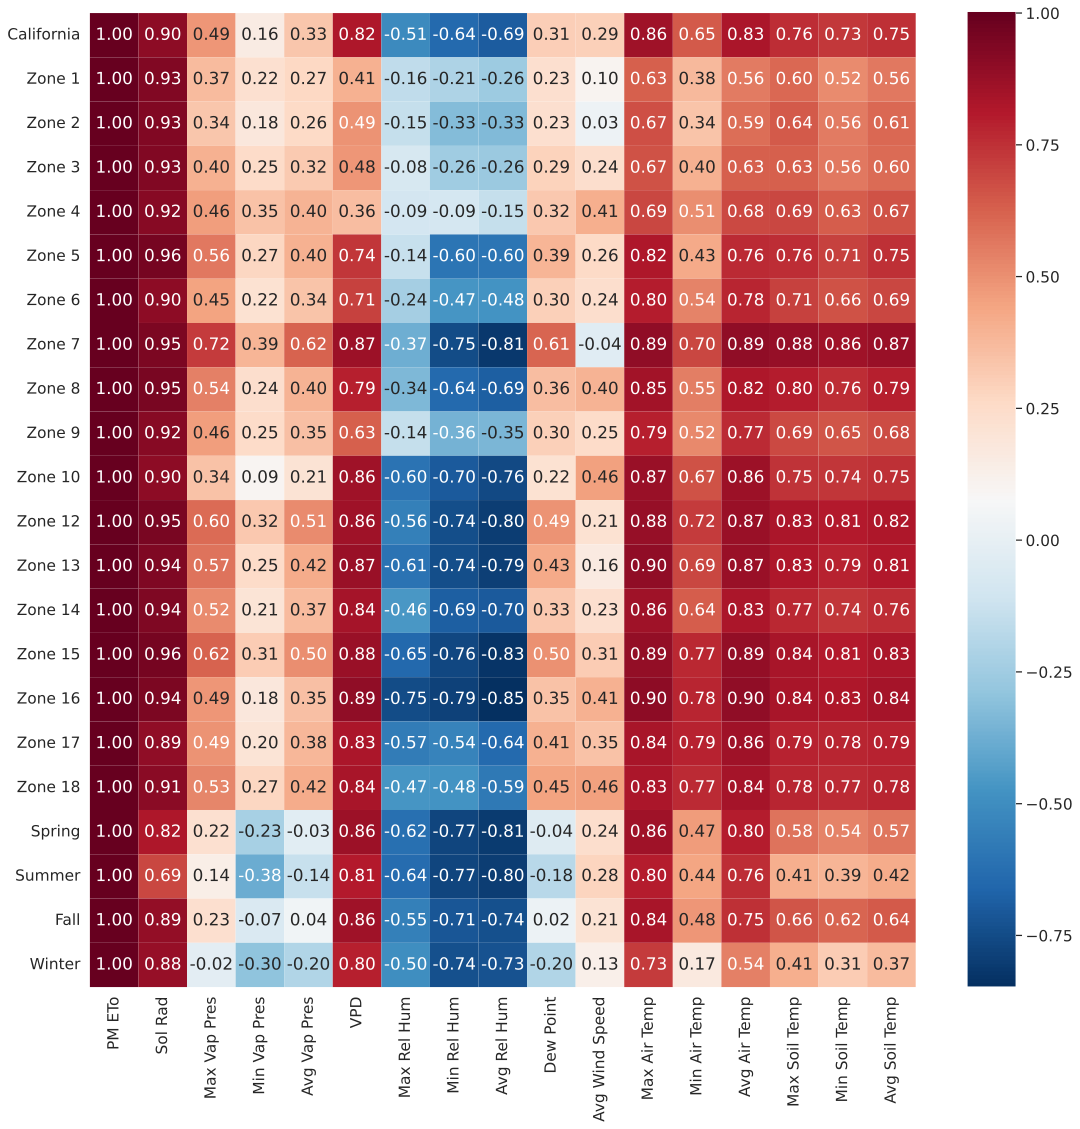

In [ ]:
# Visualizing the heatmap

plt.figure(figsize=(16,16))
ylabels = ['California','Zone 1','Zone 2','Zone 3','Zone 4','Zone 5','Zone 6',\
           'Zone 7','Zone 8','Zone 9','Zone 10','Zone 12','Zone 13',\
           'Zone 14','Zone 15','Zone 16','Zone 17','Zone 18',\
           'Spring','Summer','Fall','Winter']
xlabels = ['PM ETo','Sol Rad', 'Max Vap Pres', 'Min Vap Pres', 'Avg Vap Pres','VPD',\
           'Max Rel Hum','Min Rel Hum','Avg Rel Hum', 'Dew Point', 'Avg Wind Speed',\
           'Max Air Temp', 'Min Air Temp', 'Avg Air Temp', 'Max Soil Temp',\
           'Min Soil Temp', 'Avg Soil Temp']

z1 = sns.heatmap(PC_total, annot=True, yticklabels=ylabels, xticklabels=xlabels,\
                 cmap='RdBu_r', fmt='.2f')
plt.xticks(rotation='vertical')

sns.set(font_scale=1.4,style='white')
plt.tight_layout()

# plt.savefig('Pearson_correlation.jpg', dpi=600)

In [ ]:
# Monthly Pearson correlation

PCHData1 = AllStn[[ 'PMETo', 'SolRad', 'MaxVapPres', 'MinVapPres', 'AvgVapPres','VPD',\
                                     'MaxRelHum','MinRelHum','AvgRelHum', 'DewPoint', 'AvgWindSpeed',\
                                     'MaxAirTemp', 'MinAirTemp', 'AvgAirTemp', 'MaxSoilTemp',\
                                     'MinSoilTemp', 'AvgSoilTemp', 'Season', 'Month','EToZone']]

meteo_var = ['PMETo', 'SolRad', 'MaxVapPres', 'MinVapPres', 'AvgVapPres','VPD',\
                                    'MaxRelHum','MinRelHum','AvgRelHum', 'DewPoint', 'AvgWindSpeed',\
                                    'MaxAirTemp', 'MinAirTemp', 'AvgAirTemp', 'MaxSoilTemp',\
                                    'MinSoilTemp', 'AvgSoilTemp']

PC_monthly = [ [ None ] * 17 ] * 12

PC_monthly[0] = np.array(PCHData1[PCHData1.Month==1][meteo_var].corr()[['PMETo']]).transpose()
PC_monthly[1] = np.array(PCHData1[PCHData1.Month==2][meteo_var].corr()[['PMETo']]).transpose()
PC_monthly[2] = np.array(PCHData1[PCHData1.Month==3][meteo_var].corr()[['PMETo']]).transpose()
PC_monthly[3] = np.array(PCHData1[PCHData1.Month==4][meteo_var].corr()[['PMETo']]).transpose()
PC_monthly[4] = np.array(PCHData1[PCHData1.Month==5][meteo_var].corr()[['PMETo']]).transpose()
PC_monthly[5] = np.array(PCHData1[PCHData1.Month==6][meteo_var].corr()[['PMETo']]).transpose()
PC_monthly[6] = np.array(PCHData1[PCHData1.Month==7][meteo_var].corr()[['PMETo']]).transpose()
PC_monthly[7] = np.array(PCHData1[PCHData1.Month==8][meteo_var].corr()[['PMETo']]).transpose()
PC_monthly[8] = np.array(PCHData1[PCHData1.Month==9][meteo_var].corr()[['PMETo']]).transpose()
PC_monthly[9] = np.array(PCHData1[PCHData1.Month==10][meteo_var].corr()[['PMETo']]).transpose()
PC_monthly[10] = np.array(PCHData1[PCHData1.Month==11][meteo_var].corr()[['PMETo']]).transpose()
PC_monthly[11] = np.array(PCHData1[PCHData1.Month==12][meteo_var].corr()[['PMETo']]).transpose()

PC_monthly =np.array(PC_monthly).reshape((12, 17))

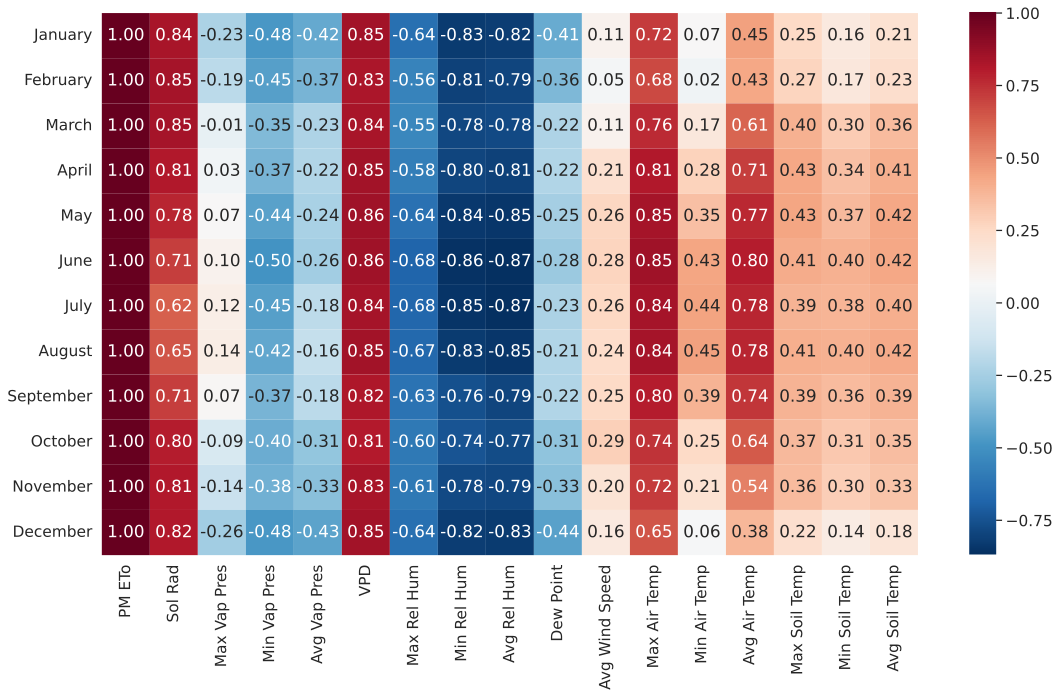

In [ ]:
# Visualizing the heatmap

plt.figure(figsize=(16,10))
ylabels = ['January', 'February', 'March', 'April', 'May', 'June', 'July',\
           'August', 'September', 'October', 'November', 'December']
xlabels = ['PM ETo','Sol Rad', 'Max Vap Pres', 'Min Vap Pres', 'Avg Vap Pres','VPD',\
           'Max Rel Hum','Min Rel Hum','Avg Rel Hum', 'Dew Point', 'Avg Wind Speed',\
           'Max Air Temp', 'Min Air Temp', 'Avg Air Temp', 'Max Soil Temp',\
           'Min Soil Temp', 'Avg Soil Temp']

z1 = sns.heatmap(PC_monthly, annot=True, yticklabels=ylabels, xticklabels=xlabels,\
                 cmap='RdBu_r', fmt='.2f')
plt.xticks(rotation='vertical')

sns.set(font_scale=1.4,style='white')
plt.tight_layout()

# plt.savefig('monthly_Pearson_correlation.jpg', dpi=600)

## Second method of feature selection:
## Mutual Information

In [ ]:
# Mutual information for the whole state

X = AllStn[['SolRad', 'MaxVapPres', 'MinVapPres', 'AvgVapPres','VPD',\
            'MaxRelHum','MinRelHum','AvgRelHum', 'DewPoint', 'AvgWindSpeed',\
            'MaxAirTemp', 'MinAirTemp', 'AvgAirTemp', 'MaxSoilTemp',\
                                     'MinSoilTemp', 'AvgSoilTemp']]
y = AllStn[['PMETo']]
from sklearn.feature_selection import mutual_info_regression
MI_state = mutual_info_regression(X,y)

ValueError: ignored

In [ ]:
# Mutual information of each zone

meteo_var = ['SolRad', 'MaxVapPres', 'MinVapPres', 'AvgVapPres','VPD',\
                                    'MaxRelHum','MinRelHum','AvgRelHum', 'DewPoint', 'AvgWindSpeed',\
                                    'MaxAirTemp', 'MinAirTemp', 'AvgAirTemp', 'MaxSoilTemp',\
                                    'MinSoilTemp', 'AvgSoilTemp']
MI_zones = [ [ None ] * 16 ] * 17
X = AllStn[AllStn.EToZone==1][meteo_var]
y = AllStn[AllStn.EToZone==1][['PMETo']]
MI_zones[0] = MI_state = skl.feature_selection.mutual_info_regression(X,y)
X = AllStn[AllStn.EToZone==2][meteo_var]
y = AllStn[AllStn.EToZone==2][['PMETo']]
MI_zones[1] = MI_state = skl.feature_selection.mutual_info_regression(X,y)
X = AllStn[AllStn.EToZone==3][meteo_var]
y = AllStn[AllStn.EToZone==3][['PMETo']]
MI_zones[2] = MI_state = skl.feature_selection.mutual_info_regression(X,y)
X = AllStn[AllStn.EToZone==4][meteo_var]
y = AllStn[AllStn.EToZone==4][['PMETo']]
MI_zones[3] = MI_state = skl.feature_selection.mutual_info_regression(X,y)
X = AllStn[AllStn.EToZone==5][meteo_var]
y = AllStn[AllStn.EToZone==5][['PMETo']]
MI_zones[4] = MI_state = skl.feature_selection.mutual_info_regression(X,y)
X = AllStn[AllStn.EToZone==6][meteo_var]
y = AllStn[AllStn.EToZone==6][['PMETo']]
MI_zones[5] = MI_state = skl.feature_selection.mutual_info_regression(X,y)
X = AllStn[AllStn.EToZone==7][meteo_var]
y = AllStn[AllStn.EToZone==7][['PMETo']]
MI_zones[6] = MI_state = skl.feature_selection.mutual_info_regression(X,y)
X = AllStn[AllStn.EToZone==8][meteo_var]
y = AllStn[AllStn.EToZone==8][['PMETo']]
MI_zones[7] = MI_state = skl.feature_selection.mutual_info_regression(X,y)
X = AllStn[AllStn.EToZone==9][meteo_var]
y = AllStn[AllStn.EToZone==9][['PMETo']]
MI_zones[8] = MI_state = skl.feature_selection.mutual_info_regression(X,y)
X = AllStn[AllStn.EToZone==10][meteo_var]
y = AllStn[AllStn.EToZone==10][['PMETo']]
MI_zones[9] = MI_state = skl.feature_selection.mutual_info_regression(X,y)
X = AllStn[AllStn.EToZone==12][meteo_var]
y = AllStn[AllStn.EToZone==12][['PMETo']]
MI_zones[10] = MI_state = skl.feature_selection.mutual_info_regression(X,y)
X = AllStn[AllStn.EToZone==13][meteo_var]
y = AllStn[AllStn.EToZone==13][['PMETo']]
MI_zones[11] = MI_state = skl.feature_selection.mutual_info_regression(X,y)
X = AllStn[AllStn.EToZone==14][meteo_var]
y = AllStn[AllStn.EToZone==14][['PMETo']]
MI_zones[12] = MI_state = skl.feature_selection.mutual_info_regression(X,y)
X = AllStn[AllStn.EToZone==15][meteo_var]
y = AllStn[AllStn.EToZone==15][['PMETo']]
MI_zones[13] = MI_state = skl.feature_selection.mutual_info_regression(X,y)
X = AllStn[AllStn.EToZone==16][meteo_var]
y = AllStn[AllStn.EToZone==16][['PMETo']]
MI_zones[14] = MI_state = skl.feature_selection.mutual_info_regression(X,y)
X = AllStn[AllStn.EToZone==17][meteo_var]
y = AllStn[AllStn.EToZone==17][['PMETo']]
MI_zones[15] = MI_state = skl.feature_selection.mutual_info_regression(X,y)
X = AllStn[AllStn.EToZone==18][meteo_var]
y = AllStn[AllStn.EToZone==18][['PMETo']]
MI_zones[16] = MI_state = skl.feature_selection.mutual_info_regression(X,y)

In [ ]:
# Mutual information for each season

meteo_var = ['SolRad', 'MaxVapPres', 'MinVapPres', 'AvgVapPres','VPD',\
                                    'MaxRelHum','MinRelHum','AvgRelHum', 'DewPoint', 'AvgWindSpeed',\
                                    'MaxAirTemp', 'MinAirTemp', 'AvgAirTemp', 'MaxSoilTemp',\
                                    'MinSoilTemp', 'AvgSoilTemp']
MI_season = [ [ None ] * 16 ] * 4
X = AllStn[AllStn.Season=='Spring'][meteo_var]
y = AllStn[AllStn.Season=='Spring'][['PMETo']]
MI_season[0] = MI_state = skl.feature_selection.mutual_info_regression(X,y)
X = AllStn[AllStn.Season=='Summer'][meteo_var]
y = AllStn[AllStn.Season=='Summer'][['PMETo']]
MI_season[1] = MI_state = skl.feature_selection.mutual_info_regression(X,y)
X = AllStn[AllStn.Season=='Fall'][meteo_var]
y = AllStn[AllStn.Season=='Fall'][['PMETo']]
MI_season[2] = MI_state = skl.feature_selection.mutual_info_regression(X,y)
X = AllStn[AllStn.Season=='Winter'][meteo_var]
y = AllStn[AllStn.Season=='Winter'][['PMETo']]
MI_season[3] = MI_state = skl.feature_selection.mutual_info_regression(X,y)

In [ ]:
# Merging all the MI values

MI_total = np.concatenate(([MI_state],MI_zones,MI_season))

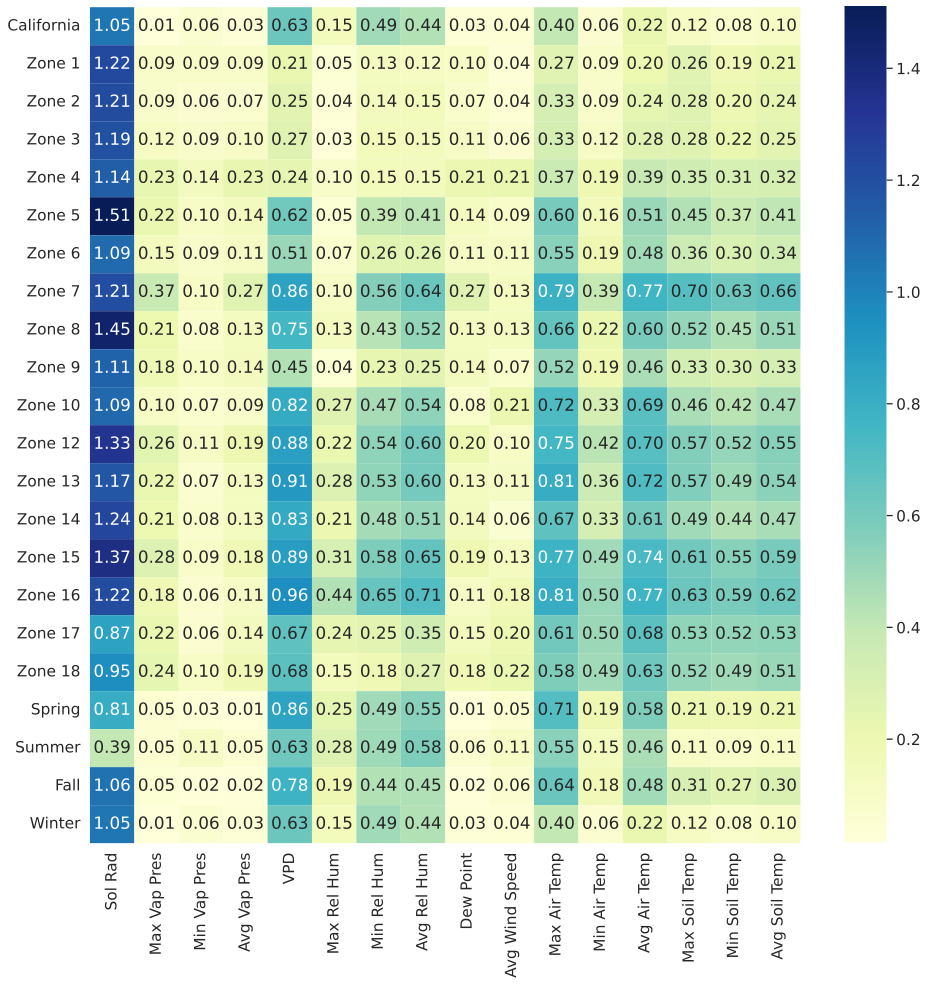

In [ ]:
# Visualizing mutual information


plt.figure(figsize=(14,14))
ylabels = ['California','Zone 1','Zone 2','Zone 3','Zone 4','Zone 5','Zone 6',\
           'Zone 7','Zone 8','Zone 9','Zone 10','Zone 12','Zone 13',\
           'Zone 14','Zone 15','Zone 16','Zone 17','Zone 18',\
           'Spring','Summer','Fall','Winter']
xlabels = ['Sol Rad', 'Max Vap Pres', 'Min Vap Pres', 'Avg Vap Pres','VPD',\
           'Max Rel Hum','Min Rel Hum','Avg Rel Hum', 'Dew Point', 'Avg Wind Speed',\
           'Max Air Temp', 'Min Air Temp', 'Avg Air Temp', 'Max Soil Temp',\
           'Min Soil Temp', 'Avg Soil Temp']

z1 = sns.heatmap(MI_total, annot=True, yticklabels=ylabels, xticklabels=xlabels,\
                 cmap='YlGnBu', fmt='.2f')
plt.xticks(rotation='vertical')

sns.set(font_scale=1.4,style='white')
plt.tight_layout()

# plt.savefig('mutual_information.jpg', dpi=600)

In [ ]:
# Mutual information for each month

meteo_var = ['SolRad', 'MaxVapPres', 'MinVapPres', 'AvgVapPres','VPD',\
                                    'MaxRelHum','MinRelHum','AvgRelHum', 'DewPoint', 'AvgWindSpeed',\
                                    'MaxAirTemp', 'MinAirTemp', 'AvgAirTemp', 'MaxSoilTemp',\
                                    'MinSoilTemp', 'AvgSoilTemp']

MI_months = [ [ None ] * 16 ] * 12

X = AllStn[AllStn.Month==1][meteo_var]
y = AllStn[AllStn.Month==1][['PMETo']]
MI_months[0] = MI_state = skl.feature_selection.mutual_info_regression(X,y)

X = AllStn[AllStn.Month==2][meteo_var]
y = AllStn[AllStn.Month==2][['PMETo']]
MI_months[1] = MI_state = skl.feature_selection.mutual_info_regression(X,y)

X = AllStn[AllStn.Month==3][meteo_var]
y = AllStn[AllStn.Month==3][['PMETo']]
MI_months[2] = MI_state = skl.feature_selection.mutual_info_regression(X,y)

X = AllStn[AllStn.Month==4][meteo_var]
y = AllStn[AllStn.Month==4][['PMETo']]
MI_months[3] = MI_state = skl.feature_selection.mutual_info_regression(X,y)

X = AllStn[AllStn.Month==5][meteo_var]
y = AllStn[AllStn.Month==5][['PMETo']]
MI_months[4] = MI_state = skl.feature_selection.mutual_info_regression(X,y)

X = AllStn[AllStn.Month==6][meteo_var]
y = AllStn[AllStn.Month==6][['PMETo']]
MI_months[5] = MI_state = skl.feature_selection.mutual_info_regression(X,y)

X = AllStn[AllStn.Month==7][meteo_var]
y = AllStn[AllStn.Month==7][['PMETo']]
MI_months[6] = MI_state = skl.feature_selection.mutual_info_regression(X,y)

X = AllStn[AllStn.Month==8][meteo_var]
y = AllStn[AllStn.Month==8][['PMETo']]
MI_months[7] = MI_state = skl.feature_selection.mutual_info_regression(X,y)

X = AllStn[AllStn.Month==9][meteo_var]
y = AllStn[AllStn.Month==9][['PMETo']]
MI_months[8] = MI_state = skl.feature_selection.mutual_info_regression(X,y)

X = AllStn[AllStn.Month==10][meteo_var]
y = AllStn[AllStn.Month==10][['PMETo']]
MI_months[9] = MI_state = skl.feature_selection.mutual_info_regression(X,y)

X = AllStn[AllStn.Month==11][meteo_var]
y = AllStn[AllStn.Month==11][['PMETo']]
MI_months[10] = MI_state = skl.feature_selection.mutual_info_regression(X,y)

X = AllStn[AllStn.Month==12][meteo_var]
y = AllStn[AllStn.Month==12][['PMETo']]
MI_months[11] = MI_state = skl.feature_selection.mutual_info_regression(X,y)

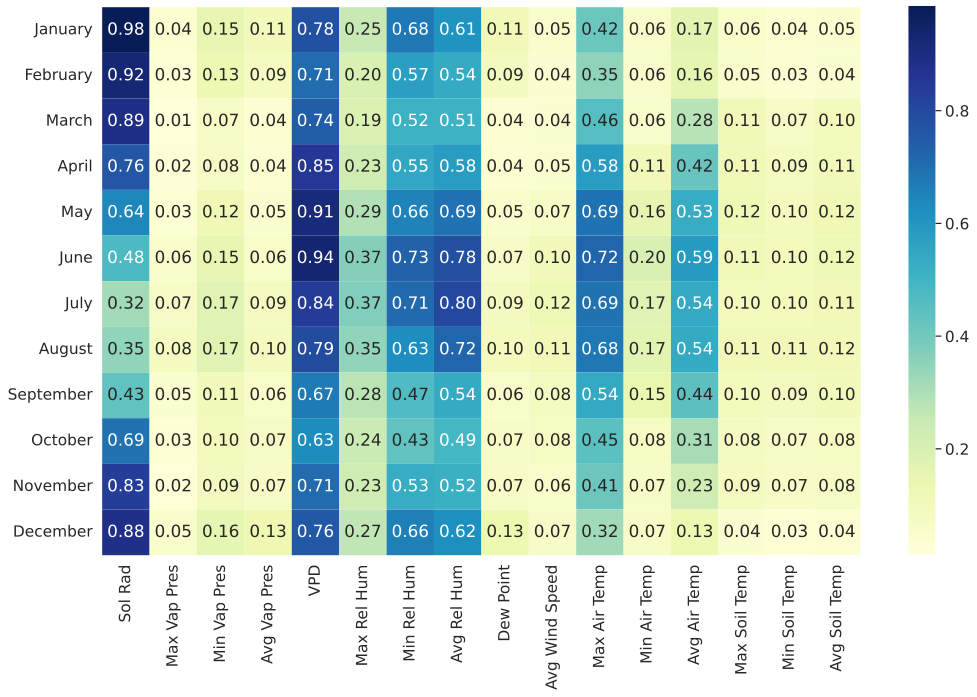

In [ ]:
# Visualizing monthly mutual information


plt.figure(figsize=(15,10))
ylabels = ['January', 'February', 'March', 'April', 'May', 'June', 'July',\
           'August', 'September', 'October', 'November', 'December']
xlabels = ['Sol Rad', 'Max Vap Pres', 'Min Vap Pres', 'Avg Vap Pres','VPD',\
           'Max Rel Hum','Min Rel Hum','Avg Rel Hum', 'Dew Point', 'Avg Wind Speed',\
           'Max Air Temp', 'Min Air Temp', 'Avg Air Temp', 'Max Soil Temp',\
           'Min Soil Temp', 'Avg Soil Temp']

z1 = sns.heatmap(MI_months, annot=True, yticklabels=ylabels, xticklabels=xlabels,\
                 cmap='YlGnBu', fmt='.2f')
plt.xticks(rotation='vertical')

sns.set(font_scale=1.4,style='white')
plt.tight_layout()

# plt.savefig('monthly_mutual_information.jpg', dpi=600)

## Third Method of Feature Selection:
## Random Forest Feature Importance

In [ ]:
# Fit a Random Forest model on the whole data

meteo_var = ['SolRad', 'MaxVapPres', 'MinVapPres', 'AvgVapPres', 'VPD',\
             'MaxRelHum','MinRelHum','AvgRelHum', 'DewPoint', 'AvgWindSpeed',\
             'MaxAirTemp', 'MinAirTemp', 'AvgAirTemp', 'MaxSoilTemp',\
                                    'MinSoilTemp', 'AvgSoilTemp']
X = AllStn[meteo_var]
y = AllStn[['PMETo']]

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

model.fit(X, y)

RandomForestRegressor()

In [ ]:
# Get feature importance for the whole data

importance_state = model.feature_importances_

In [ ]:
importance_state

array([7.75144569e-01, 2.73032758e-04, 2.15695620e-04, 9.34081226e-05,
       1.79157455e-01, 5.28441144e-04, 7.80747845e-04, 1.64715772e-03,
       2.94376317e-04, 2.67073544e-02, 1.54741009e-03, 6.72196989e-04,
       1.17659699e-02, 4.13464248e-04, 4.25907216e-04, 3.32813648e-04])

In [ ]:
# Fit Random Forest models for each zone and get the feature importance

meteo_var = ['SolRad', 'MaxVapPres', 'MinVapPres', 'AvgVapPres', 'VPD',\
                                    'MaxRelHum','MinRelHum','AvgRelHum', 'DewPoint', 'AvgWindSpeed',\
                                    'MaxAirTemp', 'MinAirTemp', 'AvgAirTemp', 'MaxSoilTemp',\
                                    'MinSoilTemp', 'AvgSoilTemp']

importance_zones = [ [ None ] * 16 ] * 17

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

X = AllStn[AllStn.EToZone==1][meteo_var]
y = AllStn[AllStn.EToZone==1][['PMETo']]
model.fit(X, y)
importance_zones[0] = model.feature_importances_

X = AllStn[AllStn.EToZone==2][meteo_var]
y = AllStn[AllStn.EToZone==2][['PMETo']]
model.fit(X, y)
importance_zones[1] = model.feature_importances_

X = AllStn[AllStn.EToZone==3][meteo_var]
y = AllStn[AllStn.EToZone==3][['PMETo']]
model.fit(X, y)
importance_zones[2] = model.feature_importances_

X = AllStn[AllStn.EToZone==4][meteo_var]
y = AllStn[AllStn.EToZone==4][['PMETo']]
model.fit(X, y)
importance_zones[3] = model.feature_importances_

X = AllStn[AllStn.EToZone==5][meteo_var]
y = AllStn[AllStn.EToZone==5][['PMETo']]
model.fit(X, y)
importance_zones[4] = model.feature_importances_

X = AllStn[AllStn.EToZone==6][meteo_var]
y = AllStn[AllStn.EToZone==6][['PMETo']]
model.fit(X, y)
importance_zones[5] = model.feature_importances_

X = AllStn[AllStn.EToZone==7][meteo_var]
y = AllStn[AllStn.EToZone==7][['PMETo']]
model.fit(X, y)
importance_zones[6] = model.feature_importances_

X = AllStn[AllStn.EToZone==8][meteo_var]
y = AllStn[AllStn.EToZone==8][['PMETo']]
model.fit(X, y)
importance_zones[7] = model.feature_importances_

X = AllStn[AllStn.EToZone==9][meteo_var]
y = AllStn[AllStn.EToZone==9][['PMETo']]
model.fit(X, y)
importance_zones[8] = model.feature_importances_

X = AllStn[AllStn.EToZone==10][meteo_var]
y = AllStn[AllStn.EToZone==10][['PMETo']]
model.fit(X, y)
importance_zones[9] = model.feature_importances_

X = AllStn[AllStn.EToZone==12][meteo_var]
y = AllStn[AllStn.EToZone==12][['PMETo']]
model.fit(X, y)
importance_zones[10] = model.feature_importances_

X = AllStn[AllStn.EToZone==13][meteo_var]
y = AllStn[AllStn.EToZone==13][['PMETo']]
model.fit(X, y)
importance_zones[11] = model.feature_importances_

X = AllStn[AllStn.EToZone==14][meteo_var]
y = AllStn[AllStn.EToZone==14][['PMETo']]
model.fit(X, y)
importance_zones[12] = model.feature_importances_

X = AllStn[AllStn.EToZone==15][meteo_var]
y = AllStn[AllStn.EToZone==15][['PMETo']]
model.fit(X, y)
importance_zones[13] = model.feature_importances_

X = AllStn[AllStn.EToZone==16][meteo_var]
y = AllStn[AllStn.EToZone==16][['PMETo']]
model.fit(X, y)
importance_zones[14] = model.feature_importances_

X = AllStn[AllStn.EToZone==17][meteo_var]
y = AllStn[AllStn.EToZone==17][['PMETo']]
model.fit(X, y)
importance_zones[15] = model.feature_importances_

X = AllStn[AllStn.EToZone==18][meteo_var]
y = AllStn[AllStn.EToZone==18][['PMETo']]
model.fit(X, y)
importance_zones[16] = model.feature_importances_

In [ ]:
importance_zones

[array([8.66899824e-01, 3.84407975e-04, 3.78912839e-04, 1.88942131e-04,
        7.92778475e-02, 9.72546489e-04, 2.15418682e-03, 6.67053301e-03,
        4.63480578e-04, 4.49213468e-03, 3.06800101e-02, 9.23431214e-04,
        4.32743429e-03, 9.38506462e-04, 6.43931229e-04, 6.03870815e-04]),
 array([8.60179200e-01, 3.95218040e-04, 3.17257442e-04, 1.81770062e-04,
        7.13713426e-02, 2.55584059e-03, 1.89021266e-03, 7.82633361e-03,
        5.78068176e-04, 6.24086161e-03, 3.99517176e-02, 8.97656499e-04,
        5.33582738e-03, 8.12010954e-04, 7.91939245e-04, 6.74743665e-04]),
 array([8.63717276e-01, 3.62808180e-04, 3.53574401e-04, 1.82867110e-04,
        9.59948258e-02, 1.07122469e-03, 1.62909645e-03, 3.29625560e-03,
        4.56379403e-04, 9.64110678e-03, 1.54547704e-02, 8.98524734e-04,
        4.56853168e-03, 8.40948551e-04, 8.57092950e-04, 6.74717083e-04]),
 array([8.45009149e-01, 5.74813296e-04, 4.11498445e-04, 3.28998711e-04,
        9.36343486e-02, 1.08231020e-03, 3.99209718e-03, 7.

In [ ]:
# Fit Random Forest models for each season and get the feature importance

meteo_var = ['SolRad', 'MaxVapPres', 'MinVapPres', 'AvgVapPres', 'VPD',\
                                    'MaxRelHum','MinRelHum','AvgRelHum', 'DewPoint', 'AvgWindSpeed',\
                                    'MaxAirTemp', 'MinAirTemp', 'AvgAirTemp', 'MaxSoilTemp',\
                                    'MinSoilTemp', 'AvgSoilTemp']

importance_season = [ [ None ] * 16 ] * 4

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

X = AllStn[AllStn.Season=='Spring'][meteo_var]
y = AllStn[AllStn.Season=='Spring'][['PMETo']]
model.fit(X, y)
importance_season[0] = model.feature_importances_

X = AllStn[AllStn.Season=='Summer'][meteo_var]
y = AllStn[AllStn.Season=='Summer'][['PMETo']]
model.fit(X, y)
importance_season[1] = model.feature_importances_

X = AllStn[AllStn.Season=='Fall'][meteo_var]
y = AllStn[AllStn.Season=='Fall'][['PMETo']]
model.fit(X, y)
importance_season[2] = model.feature_importances_

X = AllStn[AllStn.Season=='Winter'][meteo_var]
y = AllStn[AllStn.Season=='Winter'][['PMETo']]
model.fit(X, y)
importance_season[3] = model.feature_importances_

In [ ]:
importance_season

[array([2.44736098e-01, 4.53986040e-04, 3.49775597e-04, 1.77691513e-04,
        6.98030823e-01, 1.04008237e-03, 1.49006190e-03, 2.31912454e-03,
        4.85609232e-04, 4.09037317e-02, 3.65074726e-03, 1.19719702e-03,
        3.36139117e-03, 6.39225719e-04, 6.61697063e-04, 5.02757416e-04]),
 array([2.75279215e-01, 7.45848632e-04, 5.60680605e-04, 2.47808367e-04,
        6.22811228e-01, 1.27087537e-03, 1.71241683e-03, 5.16662323e-03,
        7.09180030e-04, 7.37290565e-02, 6.96060904e-03, 1.54394342e-03,
        6.45891920e-03, 1.02840915e-03, 9.87413183e-04, 7.87772859e-04]),
 array([7.40968574e-01, 4.64589045e-04, 3.78312479e-04, 1.56367701e-04,
        1.82034062e-01, 9.02789796e-04, 1.71738979e-03, 3.01407398e-03,
        5.23857483e-04, 5.70063291e-02, 1.64789841e-03, 1.03312662e-03,
        7.86949291e-03, 8.38498634e-04, 7.67076886e-04, 6.77560700e-04]),
 array([7.41894961e-01, 4.68291222e-04, 3.64824371e-04, 1.50959734e-04,
        1.86321657e-01, 1.09114971e-03, 2.72630064e-03, 5.

In [ ]:
# Results of random forest models

importance_state1 = np.array([7.75144569e-01, 2.73032758e-04, 2.15695620e-04, 9.34081226e-05,\
       1.79157455e-01, 5.28441144e-04, 7.80747845e-04, 1.64715772e-03,\
       2.94376317e-04, 2.67073544e-02, 1.54741009e-03, 6.72196989e-04,\
       1.17659699e-02, 4.13464248e-04, 4.25907216e-04, 3.32813648e-04])

importance_zones1 = np.array([[8.66899824e-01, 3.84407975e-04, 3.78912839e-04, 1.88942131e-04,\
        7.92778475e-02, 9.72546489e-04, 2.15418682e-03, 6.67053301e-03,\
        4.63480578e-04, 4.49213468e-03, 3.06800101e-02, 9.23431214e-04,\
        4.32743429e-03, 9.38506462e-04, 6.43931229e-04, 6.03870815e-04],\
 [8.60179200e-01, 3.95218040e-04, 3.17257442e-04, 1.81770062e-04,\
        7.13713426e-02, 2.55584059e-03, 1.89021266e-03, 7.82633361e-03,\
        5.78068176e-04, 6.24086161e-03, 3.99517176e-02, 8.97656499e-04,\
        5.33582738e-03, 8.12010954e-04, 7.91939245e-04, 6.74743665e-04],\
 [8.63717276e-01, 3.62808180e-04, 3.53574401e-04, 1.82867110e-04,\
        9.59948258e-02, 1.07122469e-03, 1.62909645e-03, 3.29625560e-03,\
        4.56379403e-04, 9.64110678e-03, 1.54547704e-02, 8.98524734e-04,\
        4.56853168e-03, 8.40948551e-04, 8.57092950e-04, 6.74717083e-04],\
 [8.45009149e-01, 5.74813296e-04, 4.11498445e-04, 3.28998711e-04,\
        9.36343486e-02, 1.08231020e-03, 3.99209718e-03, 7.19719233e-03,\
        8.26734084e-04, 4.13583250e-03, 3.11837029e-02, 7.98888840e-04,\
        5.70995214e-03, 1.87142966e-03, 1.41455923e-03, 1.82849285e-03],\
 [9.20354580e-01, 2.55007324e-04, 1.95704633e-04, 8.98556033e-05,\
        4.07361416e-02, 5.14837249e-04, 1.30093673e-03, 4.59510285e-03,\
        3.05382932e-04, 4.75739298e-03, 1.97413052e-02, 5.79718971e-04,\
        5.36255995e-03, 4.15502503e-04, 4.22223919e-04, 3.73747947e-04],\
 [7.91115269e-01, 2.71866687e-04, 3.04469839e-04, 1.29405183e-04,\
        1.58153893e-01, 5.65092930e-04, 1.71908767e-03, 2.87703137e-03,\
        3.66409786e-04, 1.21265773e-02, 1.67900327e-02, 7.02803499e-04,\
        1.33853001e-02, 5.23187139e-04, 5.40009022e-04, 4.29564014e-04],\
 [8.56783649e-01, 1.69944981e-04, 1.42027251e-04, 6.36564339e-05,\
        2.33510316e-02, 4.20296550e-04, 7.48025484e-04, 5.41369760e-03,\
        2.73901899e-04, 8.69062103e-03, 5.23434291e-03, 4.83650762e-04,\
        9.70262809e-02, 4.18527727e-04, 4.57949966e-04, 3.22396007e-04],\
 [9.08228558e-01, 2.30547245e-04, 1.96752655e-04, 9.44876408e-05,\
        6.60727040e-02, 5.05207644e-04, 1.20016887e-03, 3.21349584e-03,\
        3.24933145e-04, 6.06273245e-03, 1.61535752e-03, 6.34083056e-04,\
        9.47342115e-03, 7.84787865e-04, 7.89663090e-04, 5.73099699e-04],\
 [8.20759320e-01, 3.27752139e-04, 2.76301473e-04, 1.33482303e-04,\
        6.70991207e-02, 5.86927152e-04, 1.66755099e-03, 2.47380016e-03,\
        4.19292026e-04, 2.08437471e-02, 7.47129935e-02, 7.48506708e-04,\
        7.85419835e-03, 7.24209398e-04, 6.96892778e-04, 6.75904912e-04],\
 [7.59218952e-01, 2.10405840e-04, 1.71724825e-04, 8.72398917e-05,\
        1.93738379e-01, 5.50127435e-04, 1.93016068e-03, 2.78999053e-03,\
        2.66698273e-04, 1.55110160e-02, 1.05283832e-03, 6.57000758e-04,\
        2.26400492e-02, 3.91915435e-04, 4.26596206e-04, 3.56905735e-04],\
 [8.92360300e-01, 1.86831191e-04, 1.62154039e-04, 6.77391684e-05,\
        7.94597460e-02, 3.96221980e-04, 5.57991888e-04, 2.16354415e-03,\
        2.24080793e-04, 1.42721537e-02, 1.12491775e-03, 5.56632988e-04,\
        7.55520565e-03, 3.36046280e-04, 3.23416095e-04, 2.53018529e-04],\
 [8.42228357e-01, 1.82872628e-04, 1.27712771e-04, 6.59184739e-05,\
        1.34304846e-01, 4.14675103e-04, 4.47702987e-04, 8.21273167e-04,\
        2.21820636e-04, 1.23828343e-02, 1.22612889e-03, 4.88391529e-04,\
        6.03882573e-03, 3.80476618e-04, 3.48563540e-04, 3.19600701e-04],\
 [8.70067002e-01, 2.57935869e-04, 2.41156136e-04, 1.01766555e-04,\
        8.95791782e-02, 5.83508639e-04, 7.46583485e-04, 2.57609219e-03,\
        3.02280006e-04, 2.47621650e-02, 9.74752862e-04, 6.64758476e-04,\
        7.86177676e-03, 4.53105604e-04, 4.65814463e-04, 3.62124187e-04],\
 [9.12041084e-01, 1.44178206e-04, 1.47223451e-04, 5.67969333e-05,\
        6.16989491e-02, 3.17768021e-04, 5.65285738e-04, 1.20556607e-03,\
        1.67836422e-04, 1.40837976e-02, 5.23878442e-04, 3.13415013e-04,\
        7.98796053e-03, 2.63372530e-04, 2.62752201e-04, 2.20135253e-04],\
 [8.52166316e-01, 2.62258233e-04, 1.75681921e-04, 9.81010561e-05,\
        1.14899912e-01, 5.06193644e-04, 4.74817391e-04, 9.86570285e-04,\
        2.73826611e-04, 2.02621515e-02, 8.50696854e-04, 4.12114865e-04,\
        7.52751766e-03, 3.80094747e-04, 4.20008656e-04, 3.03738533e-04],\
 [7.20774979e-01, 4.16091893e-04, 2.72937643e-04, 1.65971443e-04,\
        4.45858160e-02, 7.89592699e-04, 6.70459884e-04, 3.10679941e-03,\
        4.56540268e-04, 4.80066174e-02, 1.74314609e-03, 7.68320342e-04,\
        1.76781457e-01, 5.52911245e-04, 5.11542524e-04, 3.96816771e-04],\
 [8.14308978e-01, 5.35728607e-04, 3.83029153e-04, 2.22400014e-04,\
        8.46155630e-02, 9.92043799e-04, 1.43295903e-03, 1.28844057e-03,\
        4.61982122e-04, 6.77872461e-02, 1.71432646e-03, 4.20138383e-03,\
        1.98608972e-02, 7.65230493e-04, 8.46358991e-04, 5.83432562e-04]])

importance_season1 = np.array([[2.44736098e-01, 4.53986040e-04, 3.49775597e-04, 1.77691513e-04,\
        6.98030823e-01, 1.04008237e-03, 1.49006190e-03, 2.31912454e-03,\
        4.85609232e-04, 4.09037317e-02, 3.65074726e-03, 1.19719702e-03,\
        3.36139117e-03, 6.39225719e-04, 6.61697063e-04, 5.02757416e-04],\
 [2.75279215e-01, 7.45848632e-04, 5.60680605e-04, 2.47808367e-04,\
        6.22811228e-01, 1.27087537e-03, 1.71241683e-03, 5.16662323e-03,\
        7.09180030e-04, 7.37290565e-02, 6.96060904e-03, 1.54394342e-03,\
        6.45891920e-03, 1.02840915e-03, 9.87413183e-04, 7.87772859e-04],\
 [7.40968574e-01, 4.64589045e-04, 3.78312479e-04, 1.56367701e-04,\
        1.82034062e-01, 9.02789796e-04, 1.71738979e-03, 3.01407398e-03,\
        5.23857483e-04, 5.70063291e-02, 1.64789841e-03, 1.03312662e-03,\
        7.86949291e-03, 8.38498634e-04, 7.67076886e-04, 6.77560700e-04],\
 [7.41894961e-01, 4.68291222e-04, 3.64824371e-04, 1.50959734e-04,\
        1.86321657e-01, 1.09114971e-03, 2.72630064e-03, 5.18705745e-03,\
        6.34199954e-04, 4.50522022e-02, 2.38424550e-03, 1.16484634e-03,\
        1.01403057e-02, 9.20101044e-04, 8.12360114e-04, 6.86538086e-04]])



In [ ]:
# Merging the feature importance arrays

importance_total = np.concatenate(([importance_state1],importance_zones1,importance_season1))

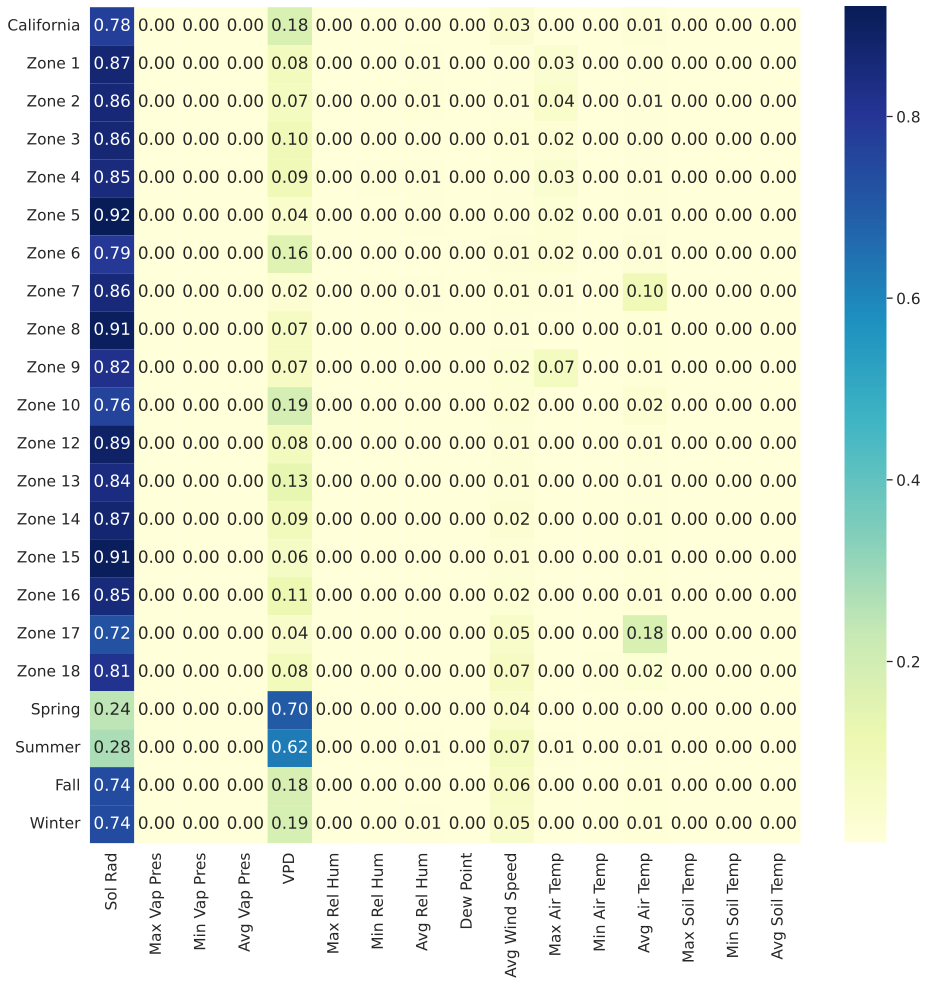

In [ ]:
# Visualizing random forest feature importance


plt.figure(figsize=(14,14))
ylabels = ['California','Zone 1','Zone 2','Zone 3','Zone 4','Zone 5','Zone 6',\
           'Zone 7','Zone 8','Zone 9','Zone 10','Zone 12','Zone 13',\
           'Zone 14','Zone 15','Zone 16','Zone 17','Zone 18',\
           'Spring','Summer','Fall','Winter']
xlabels = ['Sol Rad', 'Max Vap Pres', 'Min Vap Pres', 'Avg Vap Pres','VPD',\
           'Max Rel Hum','Min Rel Hum','Avg Rel Hum', 'Dew Point', 'Avg Wind Speed',\
           'Max Air Temp', 'Min Air Temp', 'Avg Air Temp', 'Max Soil Temp',\
           'Min Soil Temp', 'Avg Soil Temp']

z1 = sns.heatmap(importance_total, annot=True, yticklabels=ylabels, xticklabels=xlabels,\
                 cmap='YlGnBu', fmt='.2f')
plt.xticks(rotation='vertical')

sns.set(font_scale=1.4,style='white')
plt.tight_layout()

# plt.savefig('RF_feature_importance.jpg', dpi=600)

In [ ]:
# Fit Random Forest models for each month and get the feature importance

meteo_var = ['SolRad', 'MaxVapPres', 'MinVapPres', 'AvgVapPres','VPD',\
                                    'MaxRelHum','MinRelHum','AvgRelHum', 'DewPoint', 'AvgWindSpeed',\
                                    'MaxAirTemp', 'MinAirTemp', 'AvgAirTemp', 'MaxSoilTemp',\
                                    'MinSoilTemp', 'AvgSoilTemp']

importance_months = [ [ None ] * 16 ] * 12

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

X = AllStn[AllStn.Month==1][meteo_var]
y = AllStn[AllStn.Month==1][['PMETo']]
model.fit(X, y)
importance_months[0] = model.feature_importances_

X = AllStn[AllStn.Month==2][meteo_var]
y = AllStn[AllStn.Month==2][['PMETo']]
model.fit(X, y)
importance_months[1] = model.feature_importances_

X = AllStn[AllStn.Month==3][meteo_var]
y = AllStn[AllStn.Month==3][['PMETo']]
model.fit(X, y)
importance_months[2] = model.feature_importances_

X = AllStn[AllStn.Month==4][meteo_var]
y = AllStn[AllStn.Month==4][['PMETo']]
model.fit(X, y)
importance_months[3] = model.feature_importances_

X = AllStn[AllStn.Month==5][meteo_var]
y = AllStn[AllStn.Month==5][['PMETo']]
model.fit(X, y)
importance_months[4] = model.feature_importances_

X = AllStn[AllStn.Month==6][meteo_var]
y = AllStn[AllStn.Month==6][['PMETo']]
model.fit(X, y)
importance_months[5] = model.feature_importances_

X = AllStn[AllStn.Month==7][meteo_var]
y = AllStn[AllStn.Month==7][['PMETo']]
model.fit(X, y)
importance_months[6] = model.feature_importances_

X = AllStn[AllStn.Month==8][meteo_var]
y = AllStn[AllStn.Month==8][['PMETo']]
model.fit(X, y)
importance_months[7] = model.feature_importances_

X = AllStn[AllStn.Month==9][meteo_var]
y = AllStn[AllStn.Month==9][['PMETo']]
model.fit(X, y)
importance_months[8] = model.feature_importances_

X = AllStn[AllStn.Month==10][meteo_var]
y = AllStn[AllStn.Month==10][['PMETo']]
model.fit(X, y)
importance_months[9] = model.feature_importances_

X = AllStn[AllStn.Month==11][meteo_var]
y = AllStn[AllStn.Month==11][['PMETo']]
model.fit(X, y)
importance_months[10] = model.feature_importances_

X = AllStn[AllStn.Month==12][meteo_var]
y = AllStn[AllStn.Month==12][['PMETo']]
model.fit(X, y)
importance_months[11] = model.feature_importances_

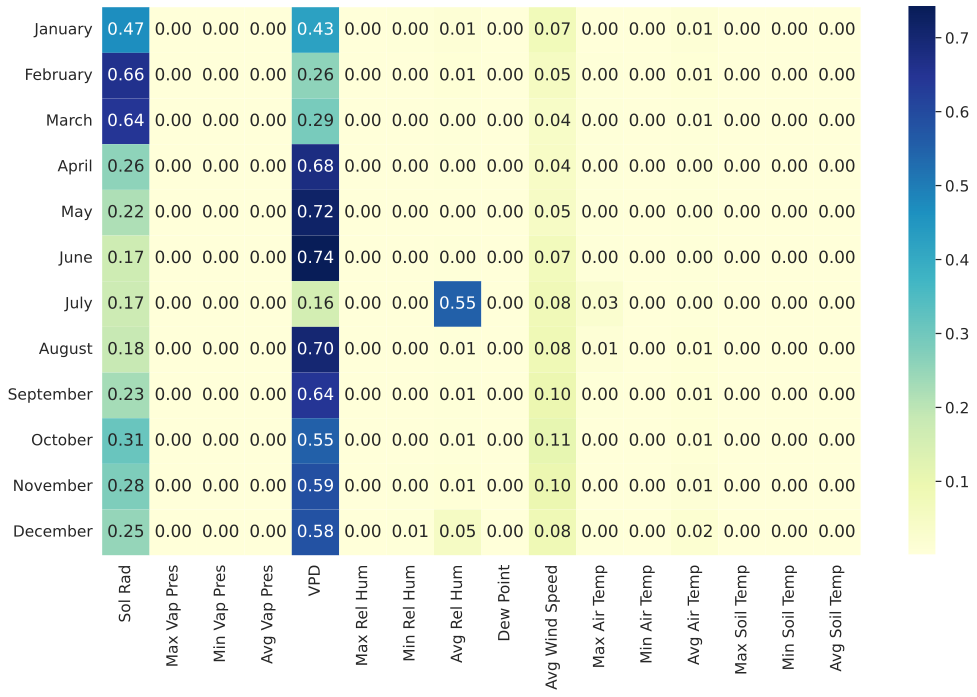

In [ ]:
# Visualizing monthly random forest feature importance


plt.figure(figsize=(15,10))
ylabels = ['January', 'February', 'March', 'April', 'May', 'June', 'July',\
           'August', 'September', 'October', 'November', 'December']
xlabels = ['Sol Rad', 'Max Vap Pres', 'Min Vap Pres', 'Avg Vap Pres','VPD',\
           'Max Rel Hum','Min Rel Hum','Avg Rel Hum', 'Dew Point', 'Avg Wind Speed',\
           'Max Air Temp', 'Min Air Temp', 'Avg Air Temp', 'Max Soil Temp',\
           'Min Soil Temp', 'Avg Soil Temp']

z1 = sns.heatmap(importance_months, annot=True, yticklabels=ylabels, xticklabels=xlabels,\
                 cmap='YlGnBu', fmt='.2f')
plt.xticks(rotation='vertical')

sns.set(font_scale=1.4,style='white')
plt.tight_layout()

# plt.savefig('monthly_RF_feature_importance.jpg', dpi=600)

## Trend Analysis

In [ ]:
# Averaged Annual Data for each station that have more than 339 days of data
# for that specific year
annual = AllStn.groupby(['StnID','Year'], sort=False).mean()
annual['Size'] = AllStn.groupby(['StnID','Year'], sort=False).size()
annual = annual[annual.Size > 339]

# Zonal annual data averaged over available stations at the specific year
annual_zone = annual.groupby(['EToZone','Year'], sort=False).mean()
annual_zone = annual_zone.reset_index()

# California annual data averaged over available stations at the specific year
annual_CA = annual.groupby(['Year'], sort=False).mean()
annual_CA = annual_CA.reset_index()

# # Number of stations for each year
# annual.groupby(['Year'], sort=False).size()

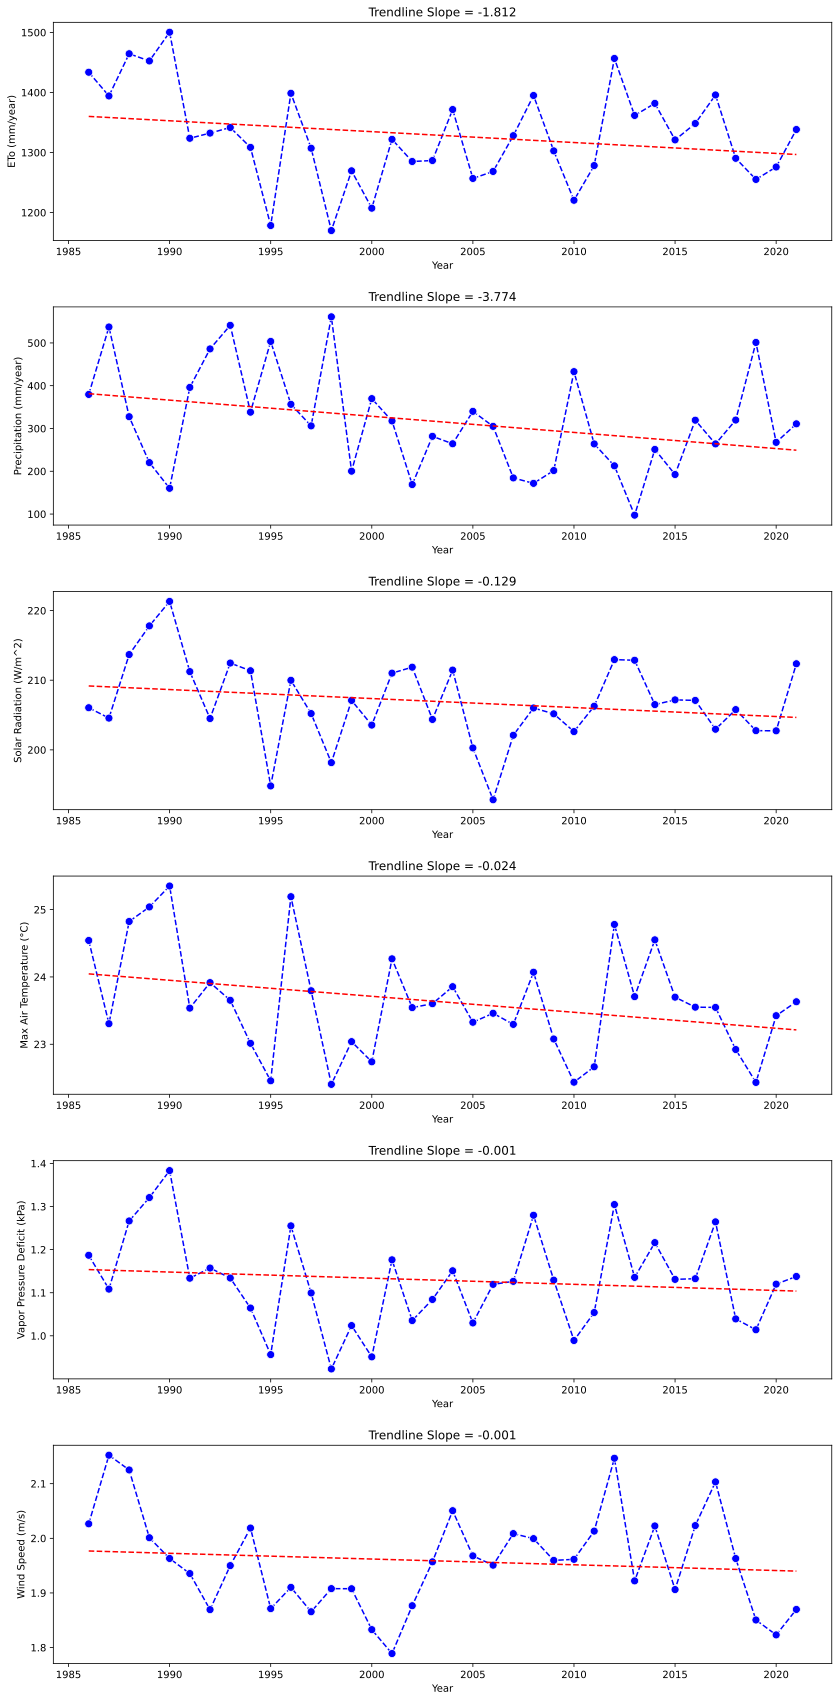

In [ ]:
# Annual trends visualization

f, axes = plt.subplots(6,1, figsize=(12,24))

f1 = sns.lineplot(x=annual_CA.Year, y=annual_CA.Daily_PMETo*365, ax=axes[0],\
                  c = 'Blue', ls = '--', marker = 'o', ms = '8')
# calc the trendline
x1 = annual_CA.Year
y1 = annual_CA.Daily_PMETo*365
z1 = np.polyfit(x1,y1, 1)
p1 = np.poly1d(z1)
f1 = sns.lineplot(x1,p1(x1), c = 'Red',ls = '--', ax=axes[0])

f2 = sns.lineplot(x=annual_CA.Year, y=annual_CA.Precipitation*365, ax=axes[1],\
                  c = 'Blue', ls = '--', marker = 'o', ms = '8')
# calc the trendline
x2 = annual_CA.Year
y2 = annual_CA.Precipitation*365
z2 = np.polyfit(x2,y2, 1)
p2 = np.poly1d(z2)
f2 = sns.lineplot(x2,p2(x2), c = 'Red',ls = '--', ax=axes[1])

f3 = sns.lineplot(x=annual_CA.Year, y=annual_CA.SolRad, ax=axes[2],\
                  c = 'Blue', ls = '--', marker = 'o', ms = '8')
# calc the trendline
x3 = annual_CA.Year
y3 = annual_CA.SolRad
z3 = np.polyfit(x3,y3, 1)
p3 = np.poly1d(z3)
f3 = sns.lineplot(x3,p3(x3), c = 'Red',ls = '--', ax=axes[2])

f4 = sns.lineplot(x=annual_CA.Year, y=annual_CA.MaxAirTemp, ax=axes[3],\
                  c = 'Blue', ls = '--', marker = 'o', ms = '8')
# calc the trendline
x4 = annual_CA.Year
y4 = annual_CA.MaxAirTemp
z4 = np.polyfit(x4,y4, 1)
p4 = np.poly1d(z4)
f4 = sns.lineplot(x4,p4(x4), c = 'Red',ls = '--', ax=axes[3])

f5 = sns.lineplot(x=annual_CA.Year, y=annual_CA.VPD, ax=axes[4],\
                  c = 'Blue', ls = '--', marker = 'o', ms = '8')
# calc the trendline
x5 = annual_CA.Year
y5 = annual_CA.VPD
z5 = np.polyfit(x5,y5, 1)
p5 = np.poly1d(z5)
f5 = sns.lineplot(x5,p5(x5), c = 'Red',ls = '--', ax=axes[4])

f6 = sns.lineplot(x=annual_CA.Year, y=annual_CA.AvgWindSpeed, ax=axes[5],\
                  c = 'Blue', ls = '--', marker = 'o', ms = '8')
# calc the trendline
x6 = annual_CA.Year
y6 = annual_CA.AvgWindSpeed
z6 = np.polyfit(x6,y6, 1)
p6 = np.poly1d(z6)
f6 = sns.lineplot(x6,p6(x6), c = 'Red',ls = '--', ax=axes[5])

f1.set(xlabel='Year', ylabel='ETo (mm/year)', title = 'Trendline Slope = '"%.3f"%(z1[0]))
f2.set(xlabel='Year', ylabel='Precipitation (mm/year)', title = 'Trendline Slope = '"%.3f"%(z2[0]))
f3.set(xlabel='Year', ylabel='Solar Radiation (W/m^2)', title = 'Trendline Slope = '"%.3f"%(z3[0]))
f4.set(xlabel='Year', ylabel='Max Air Temperature (°C)', title = 'Trendline Slope = '"%.3f"%(z4[0]))
f5.set(xlabel='Year', ylabel='Vapor Pressure Deficit (kPa)', title = 'Trendline Slope = '"%.3f"%(z5[0]))
f6.set(xlabel='Year', ylabel='Wind Speed (m/s)', title = 'Trendline Slope = '"%.3f"%(z6[0]))

sns.set(font_scale=1.5,style='whitegrid')
plt.tight_layout()
# plt.savefig('Annual_CA_Trend.jpg', dpi=600)

In [ ]:
# Averaged Seasonal Data for each station that have more than 79 days of data
# for that specific season and year
seasonal = AllStn.groupby(['StnID','Year', 'Season'], sort=False).mean()
seasonal['Size'] = AllStn.groupby(['StnID','Year', 'Season'], sort=False).size()
seasonal = seasonal[seasonal.Size > 79]

# Zonal seasonal data averaged over available stations at the specific season and year
seasonal_zone = seasonal.groupby(['EToZone','Year', 'Season'], sort=False).mean()
seasonal_zone = seasonal_zone.reset_index()

# California seasonal data averaged over available stations at the specific season and year
seasonal_CA = seasonal.groupby(['Year', 'Season'], sort=False).mean()
seasonal_CA = seasonal_CA.reset_index()

# Seasonal data averaged over each zone
spring_zone = seasonal_zone[seasonal_zone.Season == 'Spring']
summer_zone = seasonal_zone[seasonal_zone.Season == 'Summer']
fall_zone = seasonal_zone[seasonal_zone.Season == 'Fall']
winter_zone = seasonal_zone[seasonal_zone.Season == 'Winter']

# California averaged data for each season
spring_CA = seasonal_CA[seasonal_CA.Season == 'Spring']
summer_CA = seasonal_CA[seasonal_CA.Season == 'Summer']
fall_CA = seasonal_CA[seasonal_CA.Season == 'Fall']
winter_CA = seasonal_CA[seasonal_CA.Season == 'Winter']

# # Number of stations for each year
# seasonal.groupby(['Season','Year'], sort=False).size()

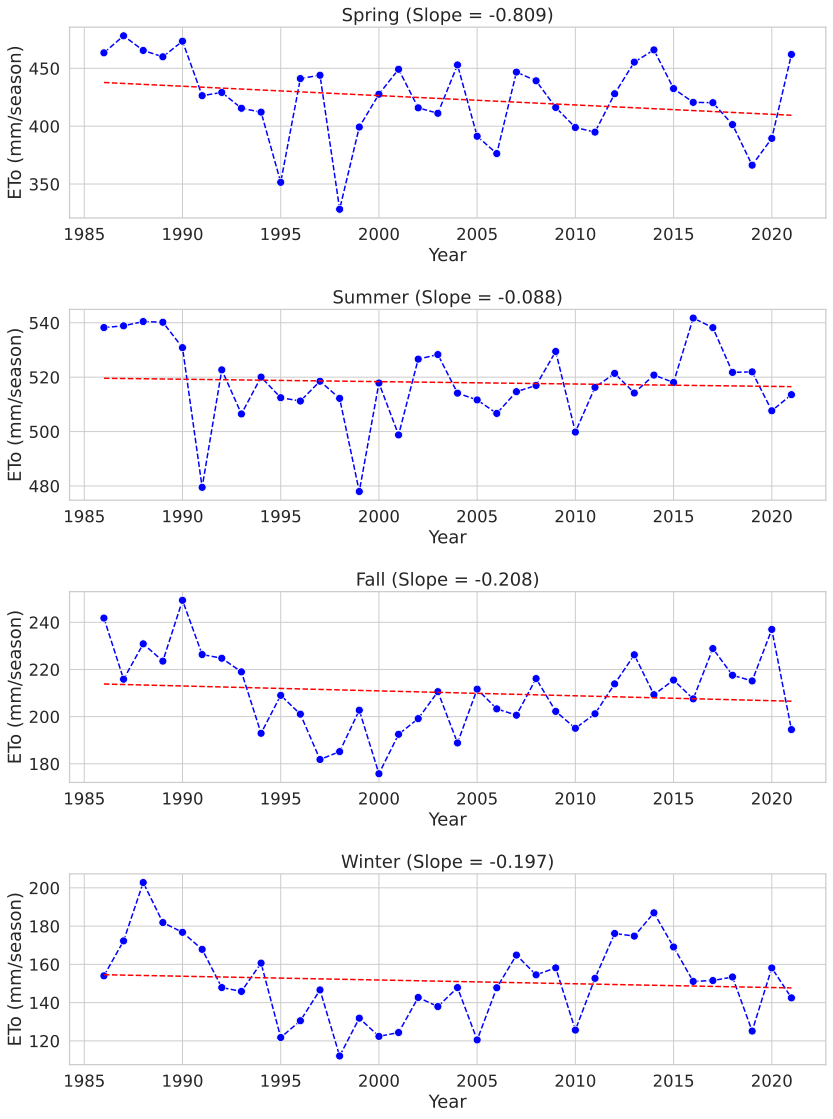

In [ ]:
# Seasonal trends visualization

f, axes = plt.subplots(4,1, figsize=(12,16))

f1 = sns.lineplot(x=spring_CA.Year, y=spring_CA.Daily_PMETo*93, ax=axes[0],\
                  c = 'Blue', ls = '--', marker = 'o', ms = '8')
# calc the trendline
x1 = spring_CA.Year
y1 = spring_CA.Daily_PMETo*93
z1 = np.polyfit(x1,y1, 1)
p1 = np.poly1d(z1)
f1 = sns.lineplot(x1,p1(x1), c = 'Red',ls = '--', ax=axes[0])

f2 = sns.lineplot(x=summer_CA.Year, y=summer_CA.Daily_PMETo*93, ax=axes[1],\
                  c = 'Blue', ls = '--', marker = 'o', ms = '8')
# calc the trendline
x2 = summer_CA.Year
y2 = summer_CA.Daily_PMETo*93
z2 = np.polyfit(x2,y2, 1)
p2 = np.poly1d(z2)
f2 = sns.lineplot(x2,p2(x2), c = 'Red',ls = '--', ax=axes[1])

f3 = sns.lineplot(x=fall_CA.Year, y=fall_CA.Daily_PMETo*90, ax=axes[2],\
                  c = 'Blue', ls = '--', marker = 'o', ms = '8')
# calc the trendline
x3 = fall_CA.Year
y3 = fall_CA.Daily_PMETo*90
z3 = np.polyfit(x3,y3, 1)
p3 = np.poly1d(z3)
f3 = sns.lineplot(x3,p3(x3), c = 'Red',ls = '--', ax=axes[2])

f4 = sns.lineplot(x=winter_CA.Year, y=winter_CA.Daily_PMETo*89, ax=axes[3],\
                  c = 'Blue', ls = '--', marker = 'o', ms = '8')
# calc the trendline
x4 = winter_CA.Year
y4 = winter_CA.Daily_PMETo*89
z4 = np.polyfit(x4,y4, 1)
p4 = np.poly1d(z4)
f4 = sns.lineplot(x4,p4(x4), c = 'Red',ls = '--', ax=axes[3])


f1.set(xlabel='Year', ylabel='ETo (mm/season)', title = 'Spring (Slope = '"%.3f)"%(z1[0]))
f2.set(xlabel='Year', ylabel='ETo (mm/season)', title = 'Summer (Slope = '"%.3f)"%(z2[0]))
f3.set(xlabel='Year', ylabel='ETo (mm/season)', title = 'Fall (Slope = '"%.3f)"%(z3[0]))
f4.set(xlabel='Year', ylabel='ETo (mm/season)', title = 'Winter (Slope = '"%.3f)"%(z4[0]))


sns.set(font_scale=1.7,style='whitegrid')
plt.tight_layout()
# plt.savefig('Seasonal_CA_Trend.jpg', dpi=600)

In [ ]:
# pymannkendall library

!pip install pymannkendall
import pymannkendall as mk

In [ ]:
from math import nan
# Mann-Kendall Test (use original MK test and Sen's slope)

# # Important note: MK test can handle the missing values and doesn't care about
# # the number and positions of nans
# A = [1,nan,nan,2,3,nan,4,nan,5]
# mk.original_test(A)

# mk.original_test(annual_CA.sort_values(by=['Year']).Daily_PMETo)

mk.original_test(winter_zone[winter_zone.EToZone == 18 ].sort_values(by=['Year']).AvgWindSpeed )


Mann_Kendall_Test(trend='no trend', h=False, p=0.15469367377127763, z=-1.4231465590334524, Tau=-0.17290552584670232, s=-97.0, var_s=4550.333333333333, slope=-0.004776980559665737, intercept=2.0132186752102195)

In [ ]:
spring_zone[spring_zone.EToZone == 1].sort_values(by=['Year'])

In [ ]:
# ETo Zones with at least 20 years of data:
# 2, 3, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 18

annual_zone[annual_zone.EToZone == 18].sort_values(by=['Year'])



,EToZone,Year,Elevation,Jul,Precipitation,SolRad,NetRad,MaxVapPres,MinVapPres,AvgVapPres,...,Gamma,Tmean,e0,Delta,Ro,Ao,Daily_PMETo,Daily-HourlySum,Month,Size
113,18.0,1986,7.5184,182.775056,0.402146,231.624523,118.421264,1.716022,0.807003,1.199136,...,0.067337,21.869845,2.849014,0.170153,2.565514,2.667888,5.233403,NaN,6.519610,356.000000
114,18.0,1987,-21.3360,178.421661,0.937301,235.524005,113.398711,1.595952,0.699404,1.079875,...,0.067564,21.757506,2.863013,0.170724,2.376610,3.418320,5.794931,NaN,6.368899,349.000000
115,18.0,1988,-10.1600,183.371412,0.463563,242.287052,111.909998,1.653502,0.743680,1.123132,...,0.067476,21.926110,2.876236,0.171498,2.348544,3.323687,5.672231,NaN,6.512643,357.000000
177,18.0,1989,1.5240,182.794872,0.126781,241.977208,104.970085,1.591168,0.744587,1.089886,...,0.067384,22.272650,2.913340,0.173635,2.216090,3.516294,5.732384,NaN,6.514245,351.000000
211,18.0,1990,-12.1920,183.102416,0.180749,237.520525,101.542614,1.640389,0.849267,1.185652,...,0.067491,21.786514,2.879735,0.171477,2.138602,3.181611,5.320213,NaN,6.528297,354.000000
178,18.0,1991,-4.0640,181.533935,0.505156,232.163778,101.689278,1.779067,0.995046,1.331328,...,0.067428,21.364347,2.763317,0.165705,2.112101,2.680678,4.792779,NaN,6.474753,347.333333
179,18.0,1993,-4.0640,183.156047,0.377527,237.854731,102.026572,1.660993,0.736709,1.125610,...,0.067428,21.882063,2.860158,0.170715,2.214816,2.944900,5.159715,NaN,6.529533,351.000000
116,18.0,1994,-11.4300,182.702584,0.213504,235.708894,100.827234,1.725235,0.775011,1.184248,...,0.067486,21.830844,2.907504,0.172724,2.151414,3.057484,5.208898,NaN,6.514708,355.000000
117,18.0,1996,-10.6680,183.787143,0.148571,239.564286,109.931429,1.858857,0.831000,1.277143,...,0.067480,22.805929,3.048326,0.180288,2.358458,3.220251,5.578708,-0.095506,6.527143,350.000000
398,18.0,1997,119.4816,180.538462,1.122507,198.045584,86.621083,1.619658,0.672365,1.078917,...,0.066461,22.731624,2.978985,0.177148,1.874041,3.340147,5.214188,0.135584,6.444444,351.000000
